<a href="https://colab.research.google.com/github/RJAbuNasser/Final-Project/blob/main/Final_Project_Girls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Improting Libraries**

In [28]:
import zipfile
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest #D'Agostino and Pearson's Test

**Core Work**

Entering xlsx file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_10.xlsx
Sheet: Sheet1
Sheet: Sheet2
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_10_10.txt
Entering xlsx file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_10_full.xlsx
Sheet: Sheet1
Sheet: Sheet2
Sheet: Sheet3
Sheet: Sheet4
Sheet: Sheet5
Sheet: Sheet6
Sheet: Sheet7
Sheet: Sheet8
Sheet: Sheet9
Sheet: Sheet10
Sheet: Sheet11
Sheet: Sheet12
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_11_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_12_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_1_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_2_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_3_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_4_10.txt


<ipython-input-36-3873fb6f06ae>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 3, figsize=(18, 6))


Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_5_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_6_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_7_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_8_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_9_10.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/20-D/Co-PPSO_10_20.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/20-D/Co-PPSO_11_20.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/20-D/Co-PPSO_12_20.txt
Entering txt file: Data-All Algos/CEC0969/969-Results/20-D/Co-PPSO_1_20.txt
Entering xlsx file: Data-All Algos/CEC0969/969-Results/20-D/Co-PPSO_20.xlsx
Sheet: Sheet1
Sheet: Sheet2
Entering xlsx file: Data-All Algos/CEC0969/969-Results/20-D/Co-PPSO_20_full.xlsx
Sheet: Sheet1
Sheet: Sheet2
Sheet: Sheet3
Sheet: Sheet4
Sheet: Sheet5
Sheet: Sheet6
Sheet: Sheet7
Sheet: Sheet8
Sheet: Sheet9
Sh

KeyboardInterrupt: 

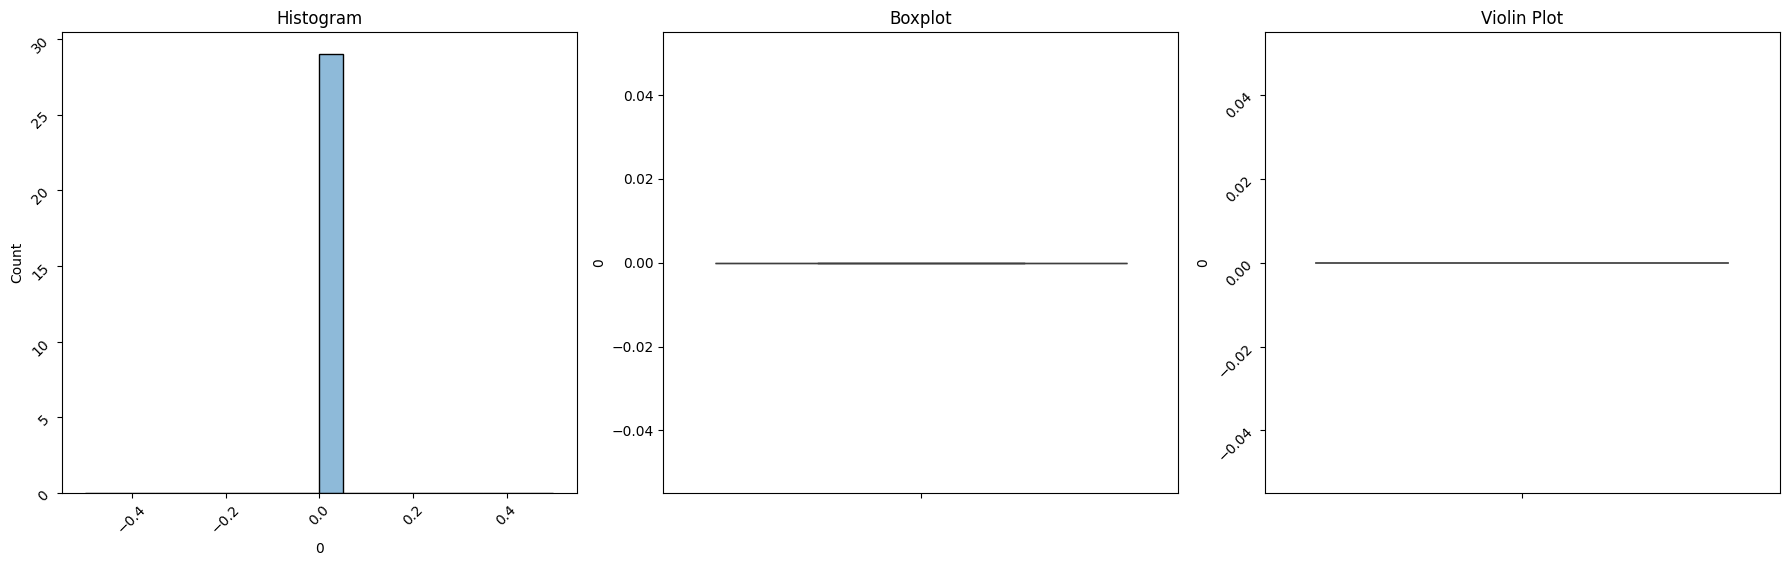

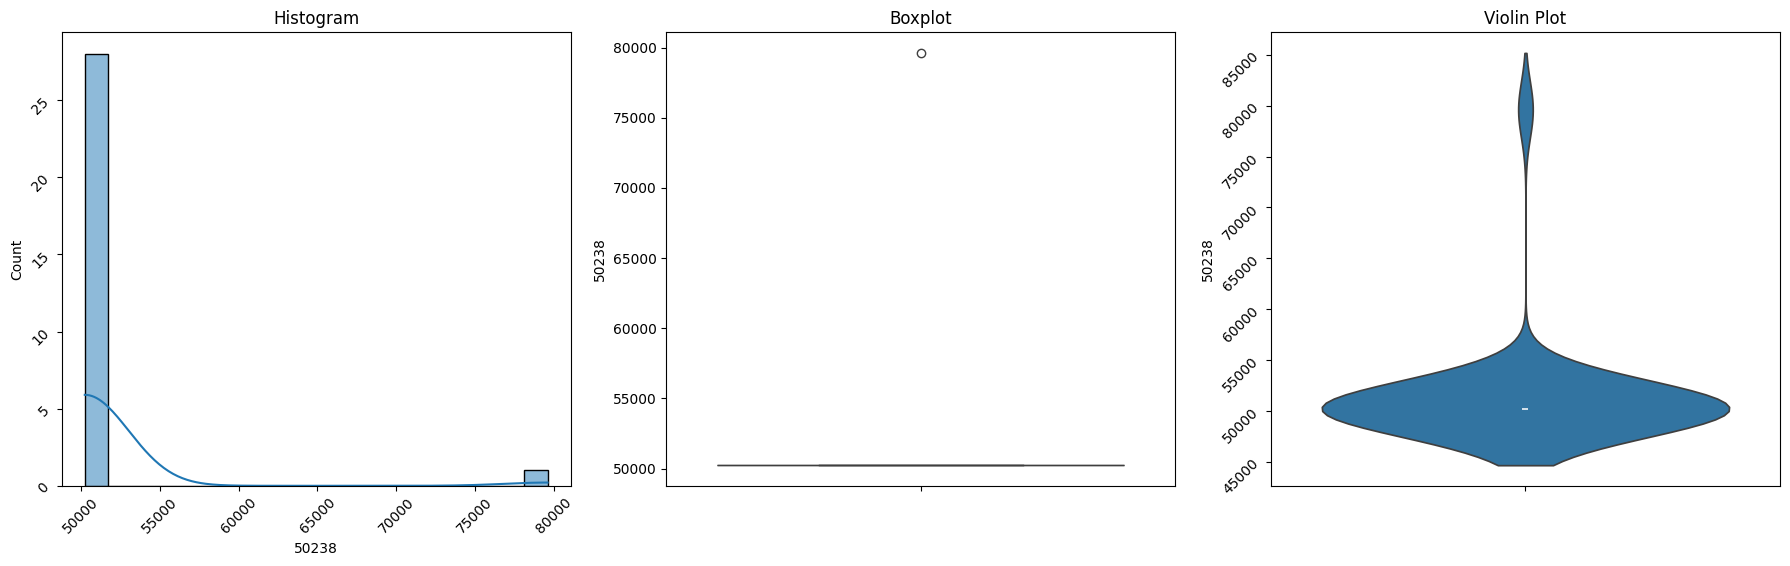

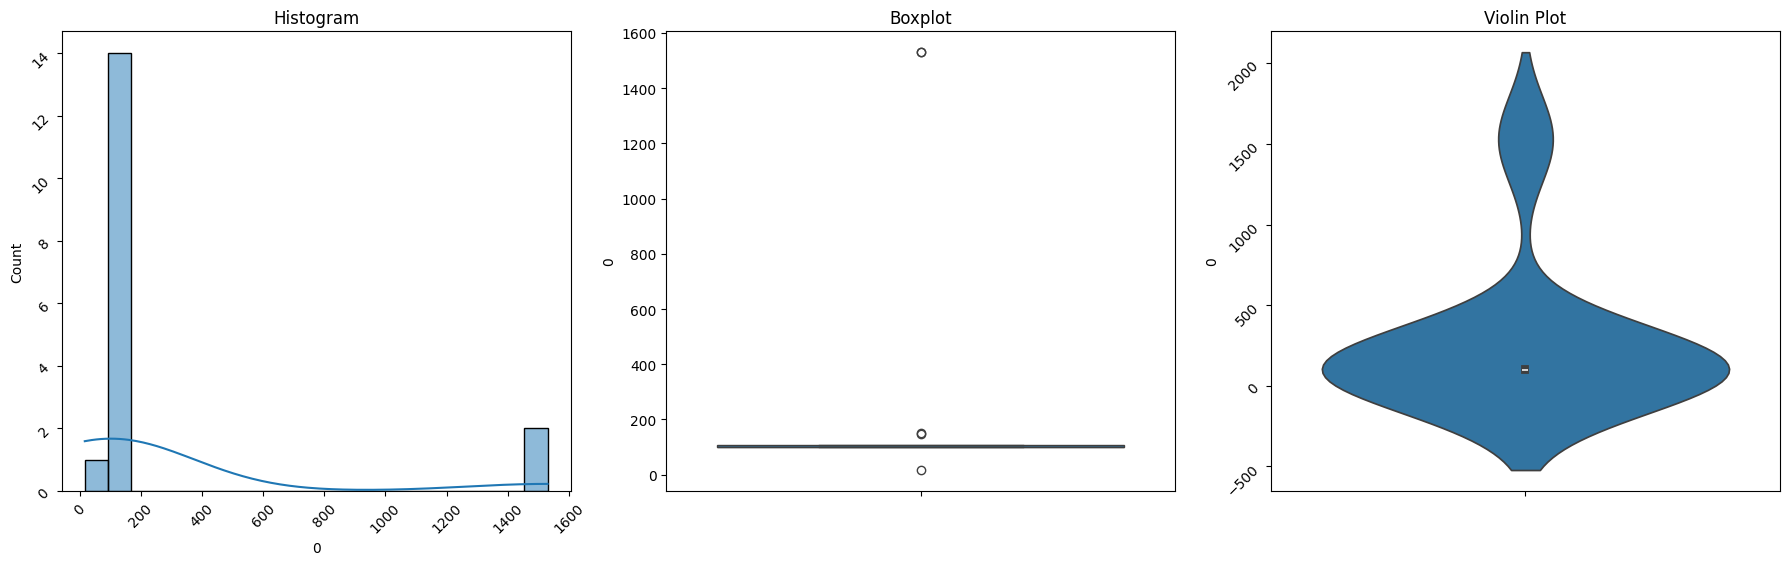

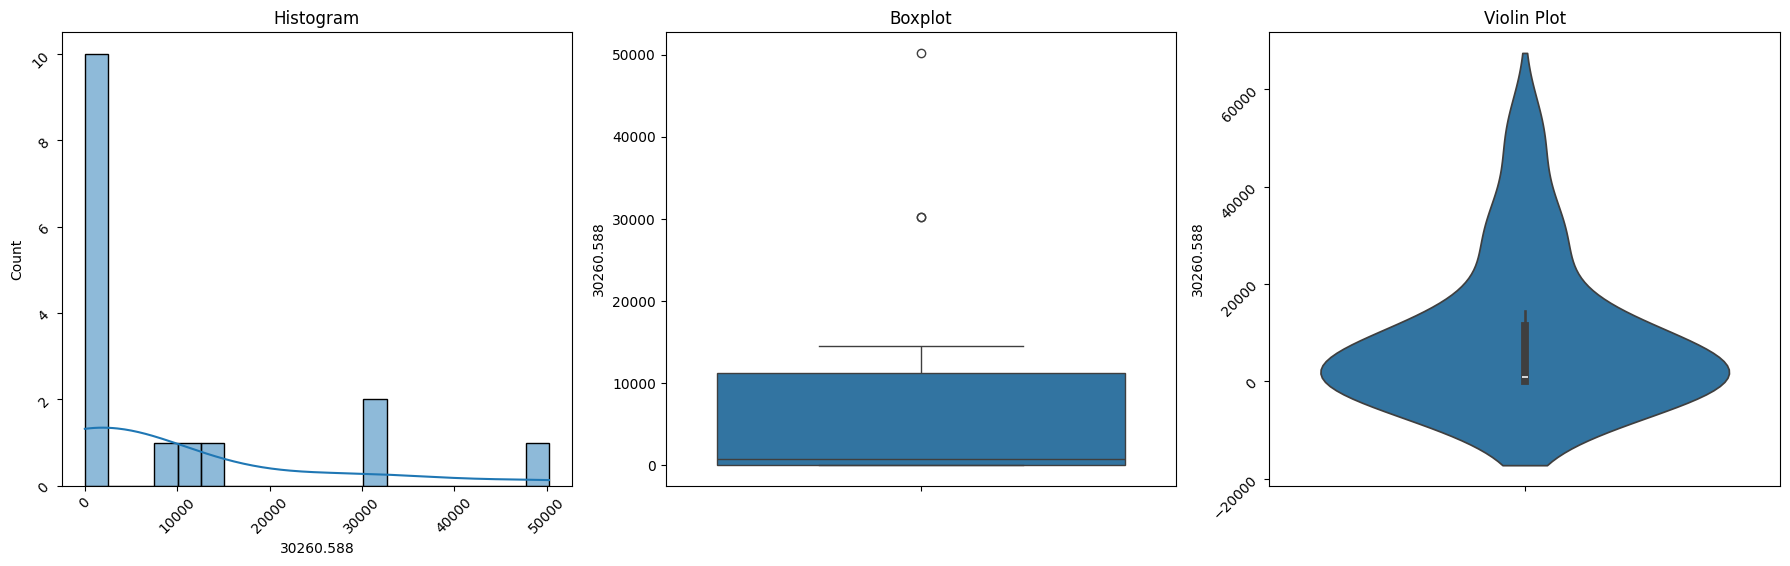

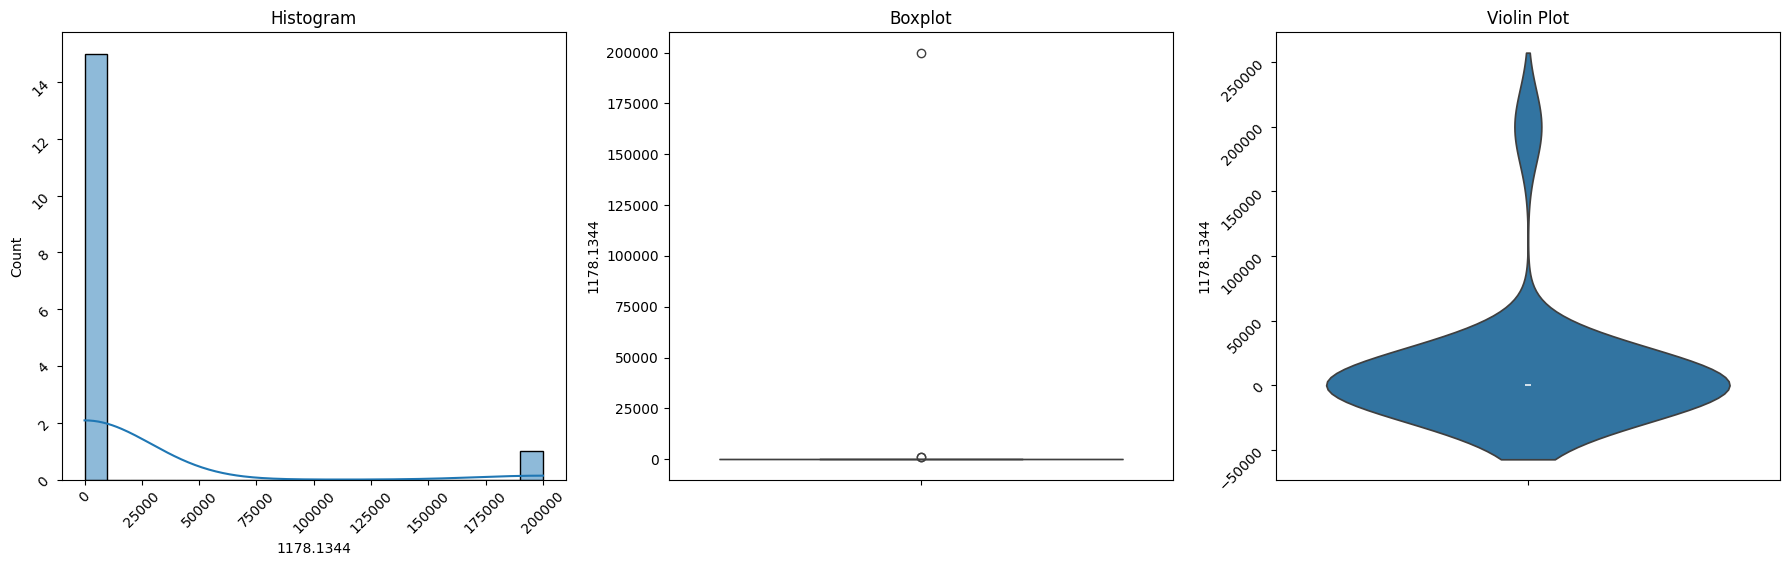

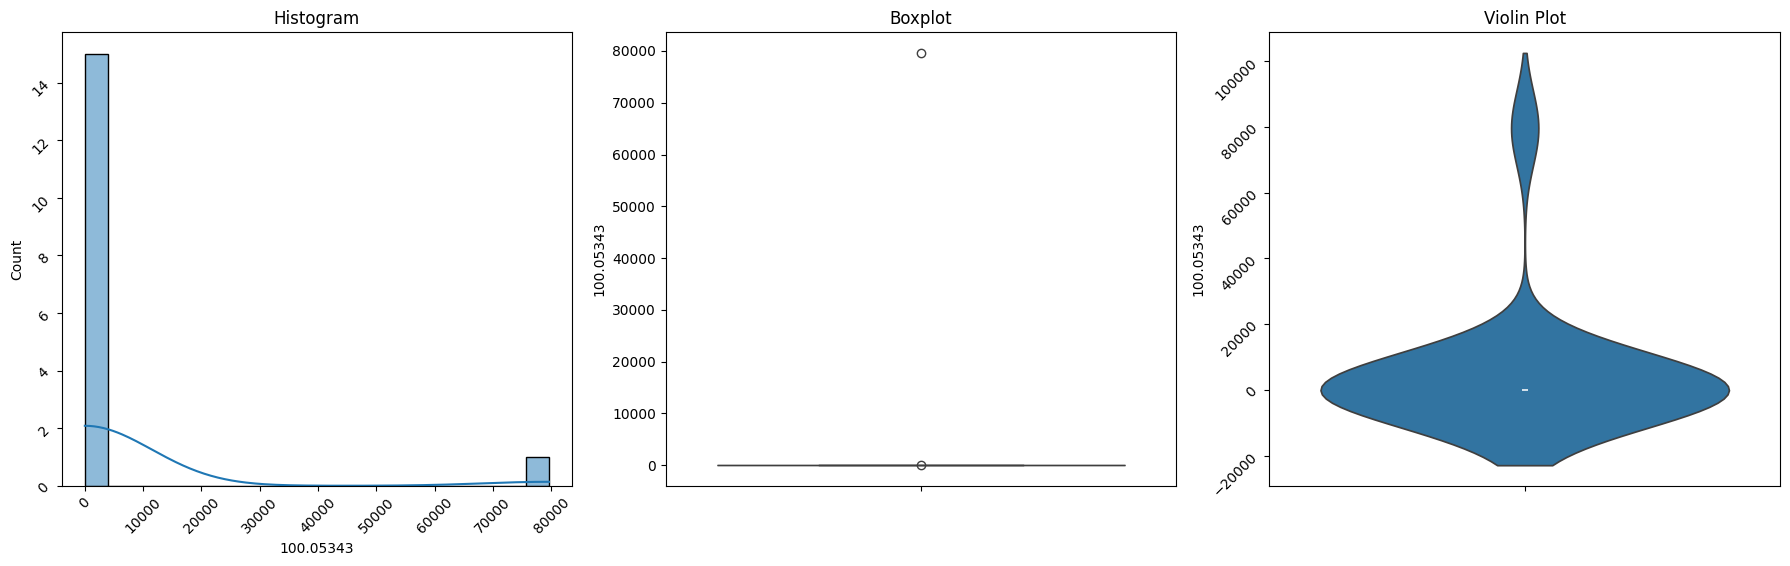

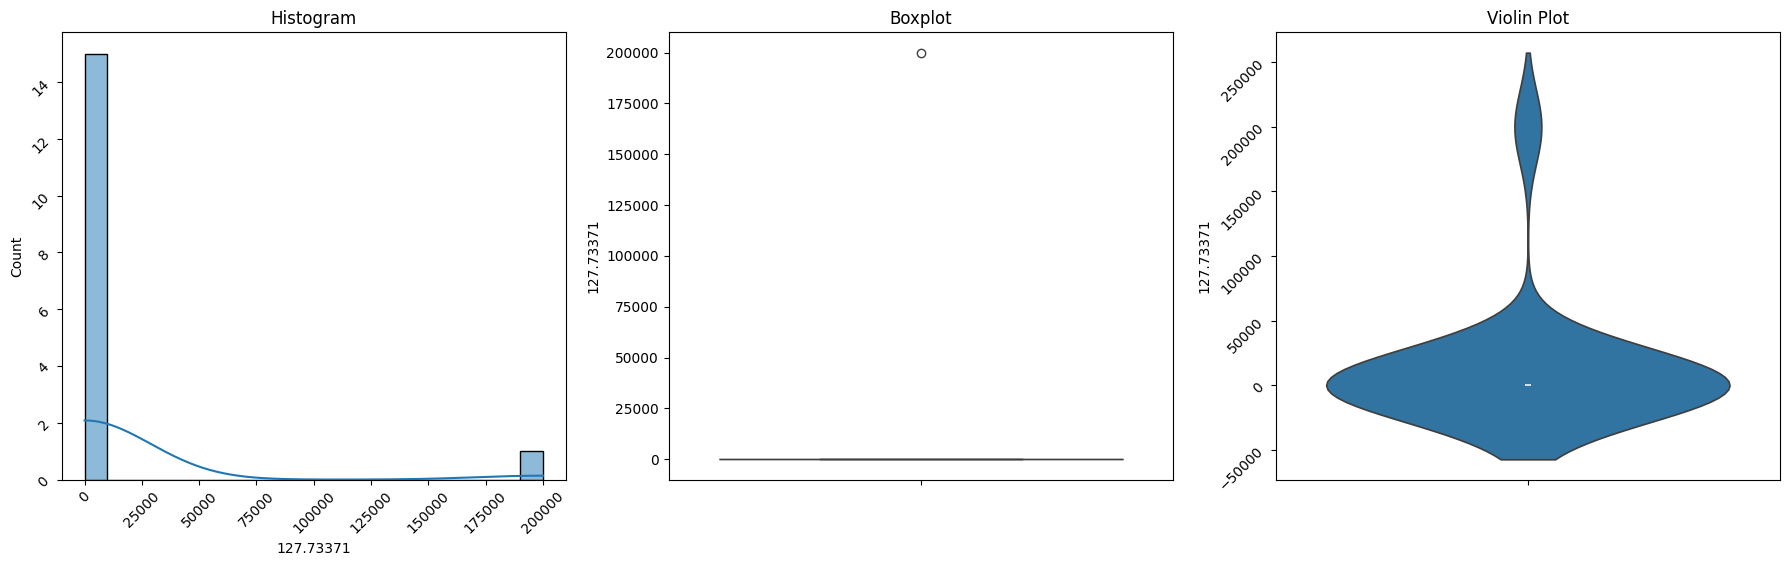

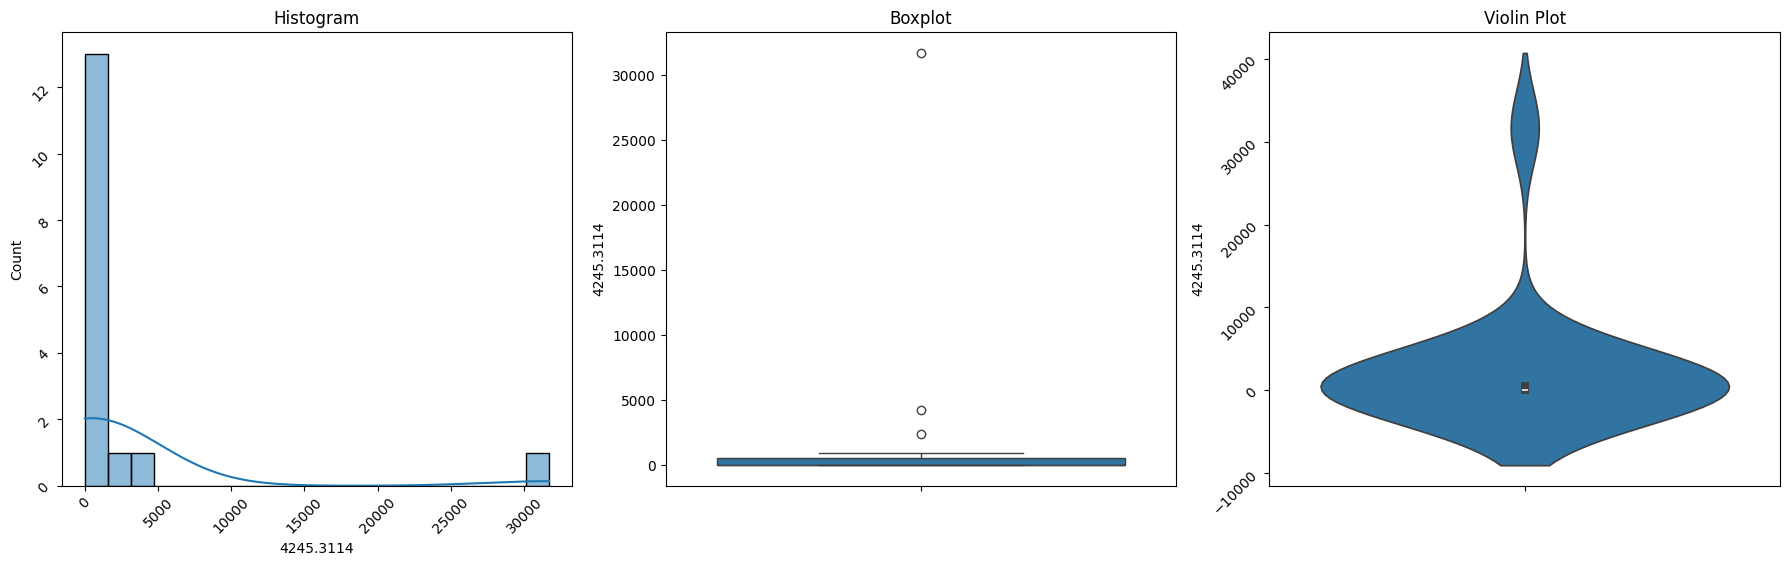

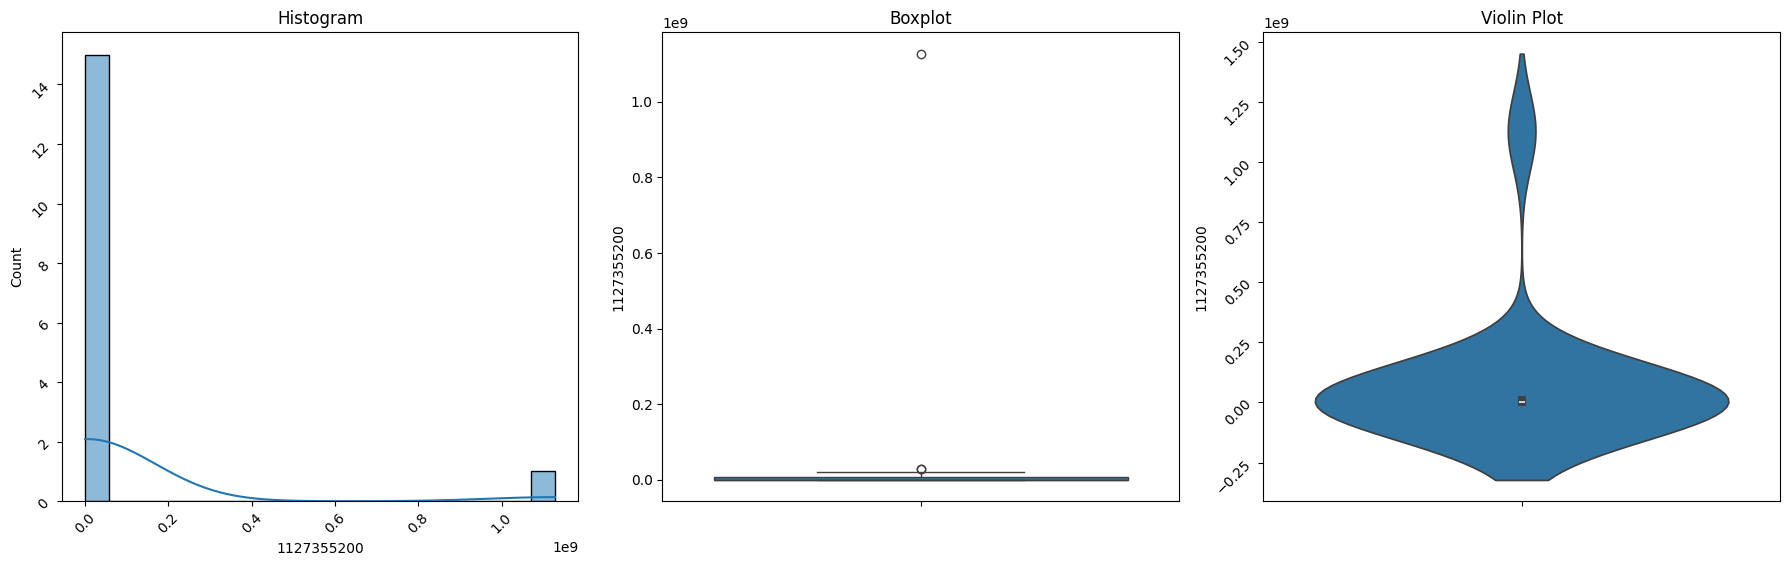

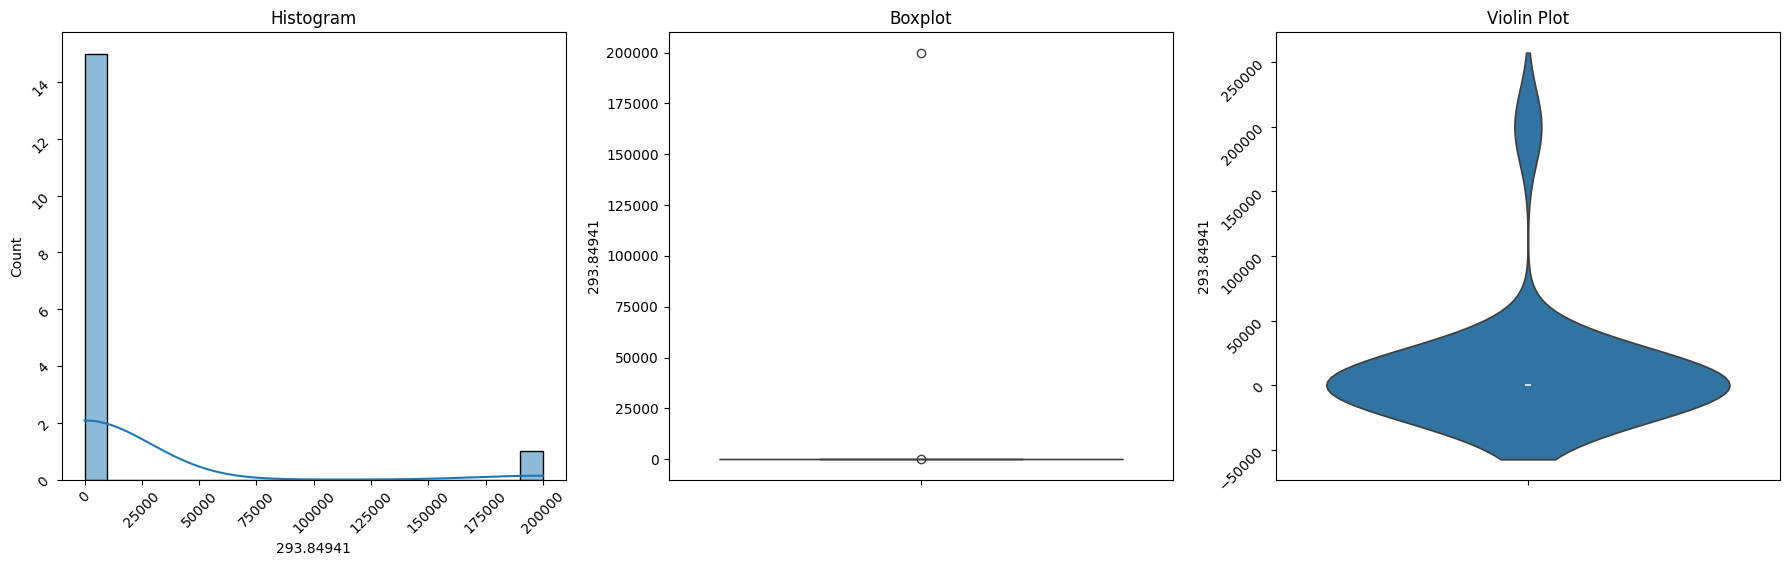

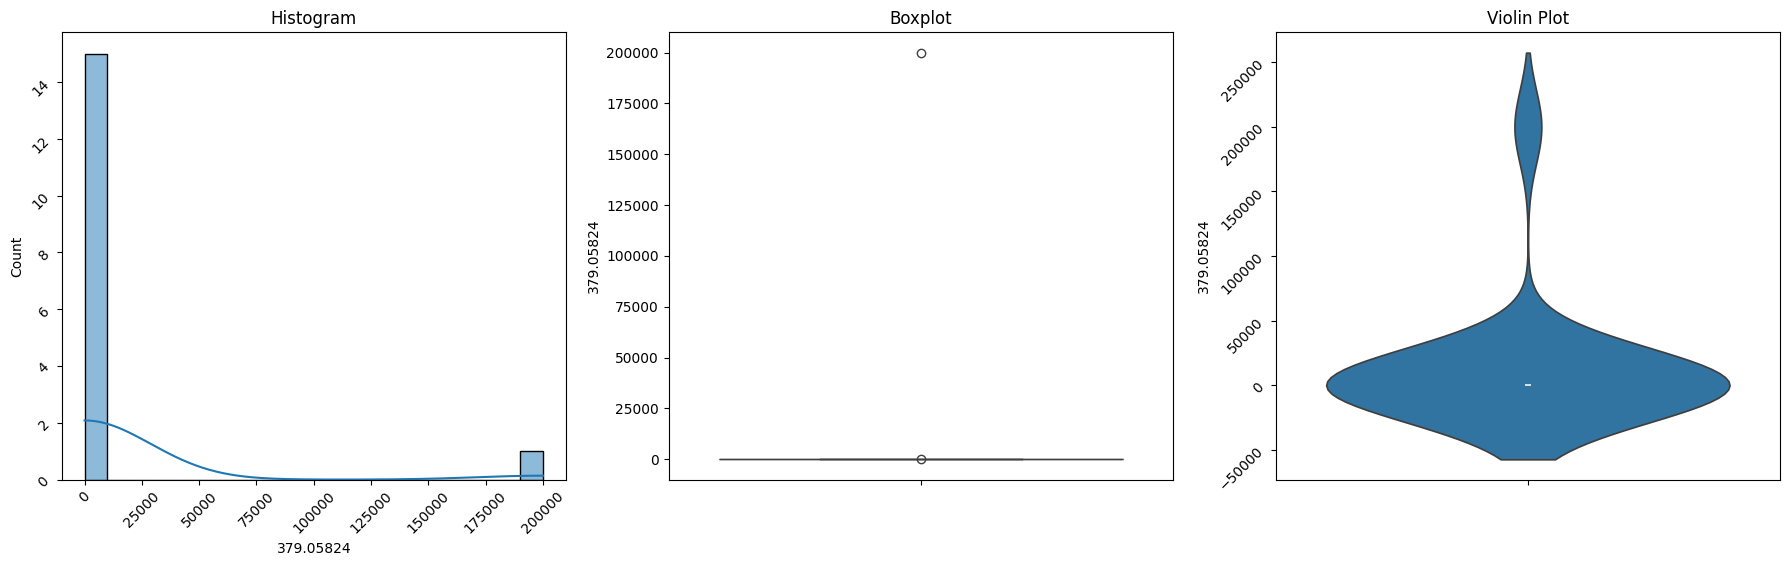

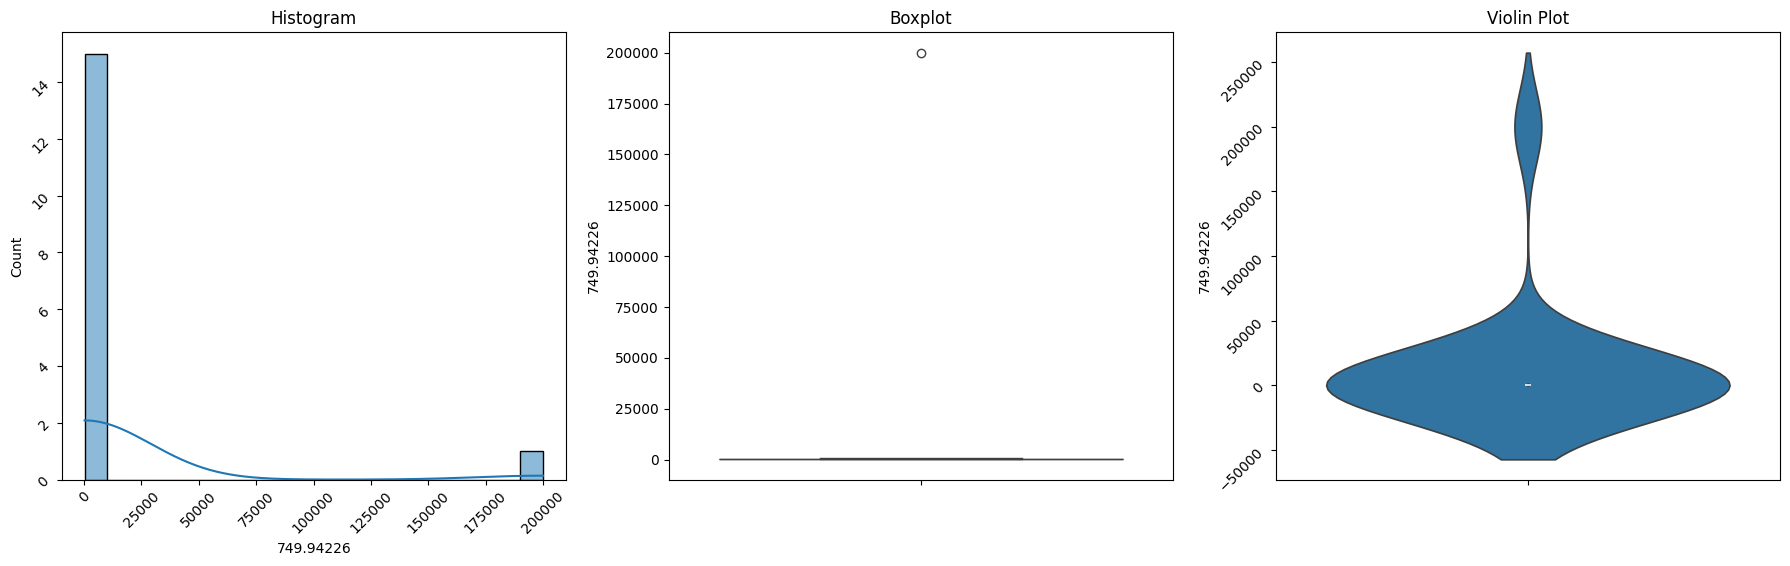

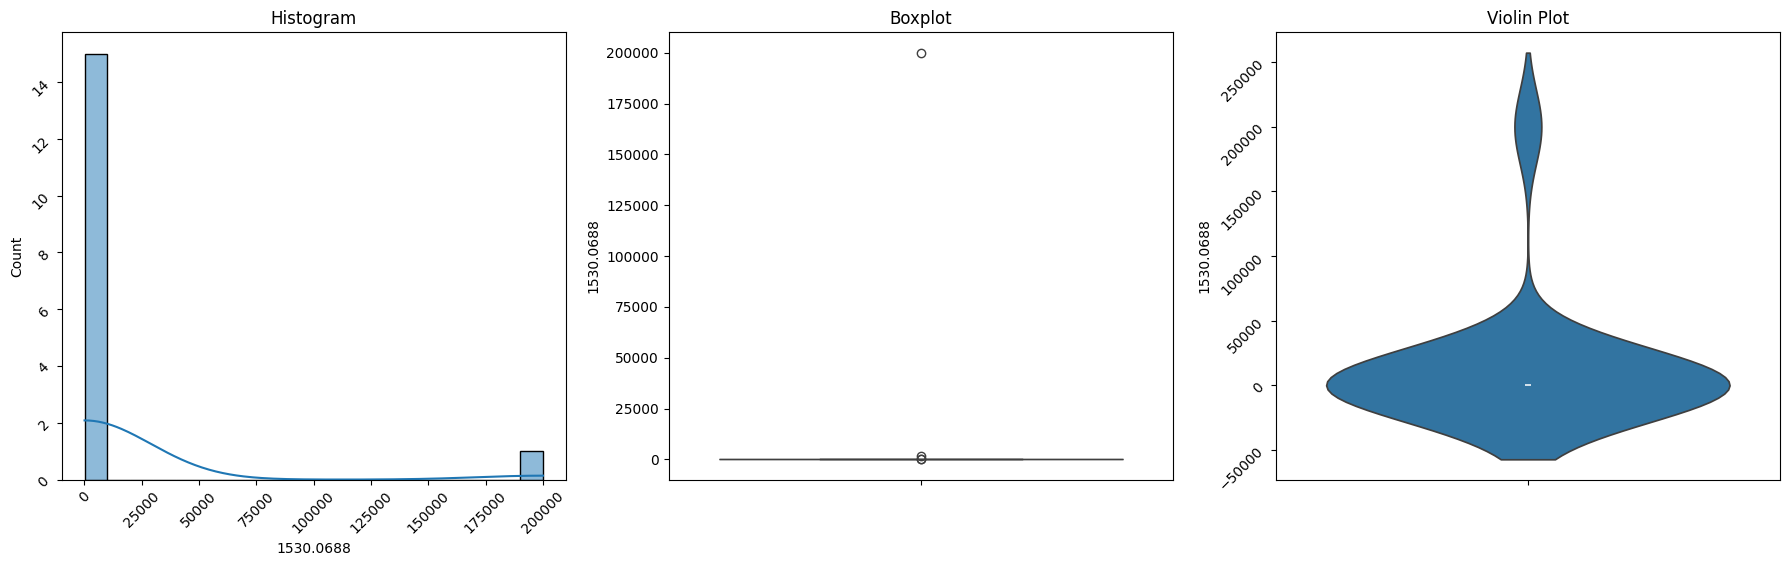

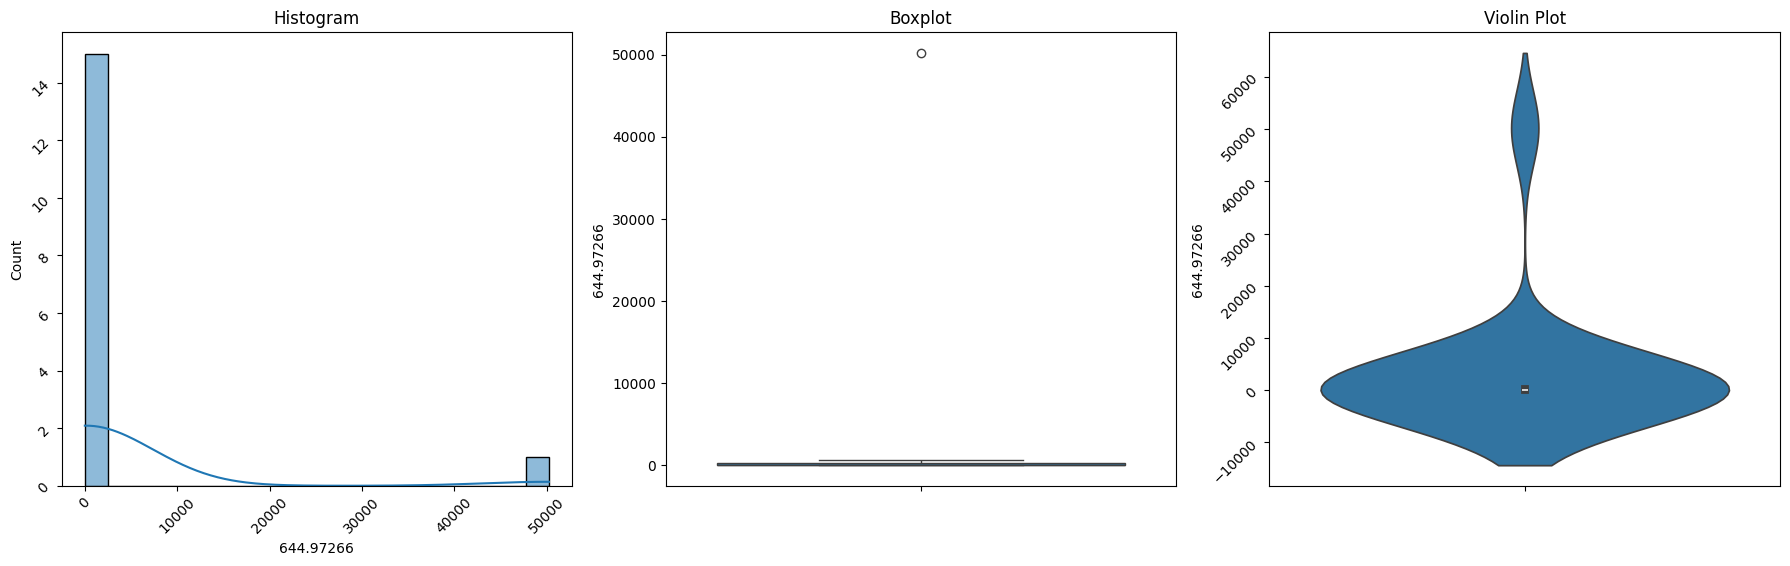

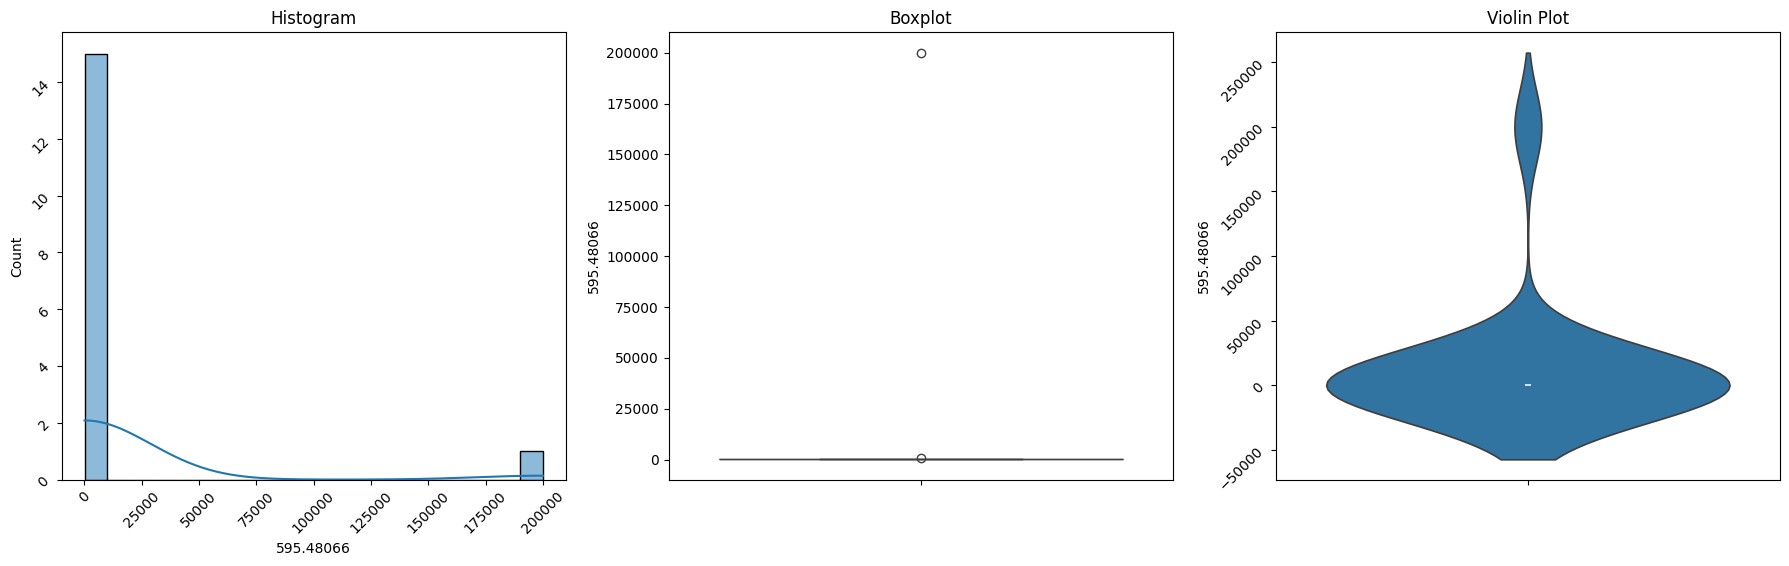

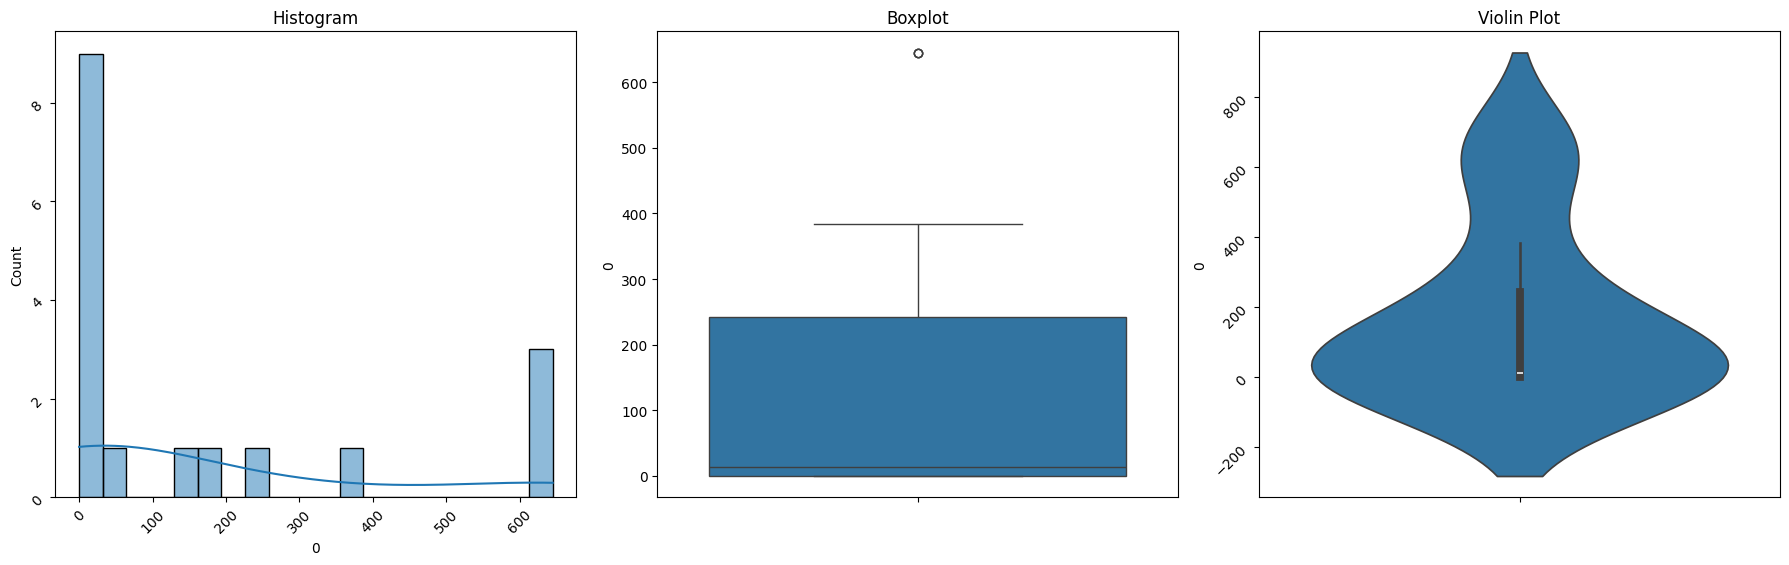

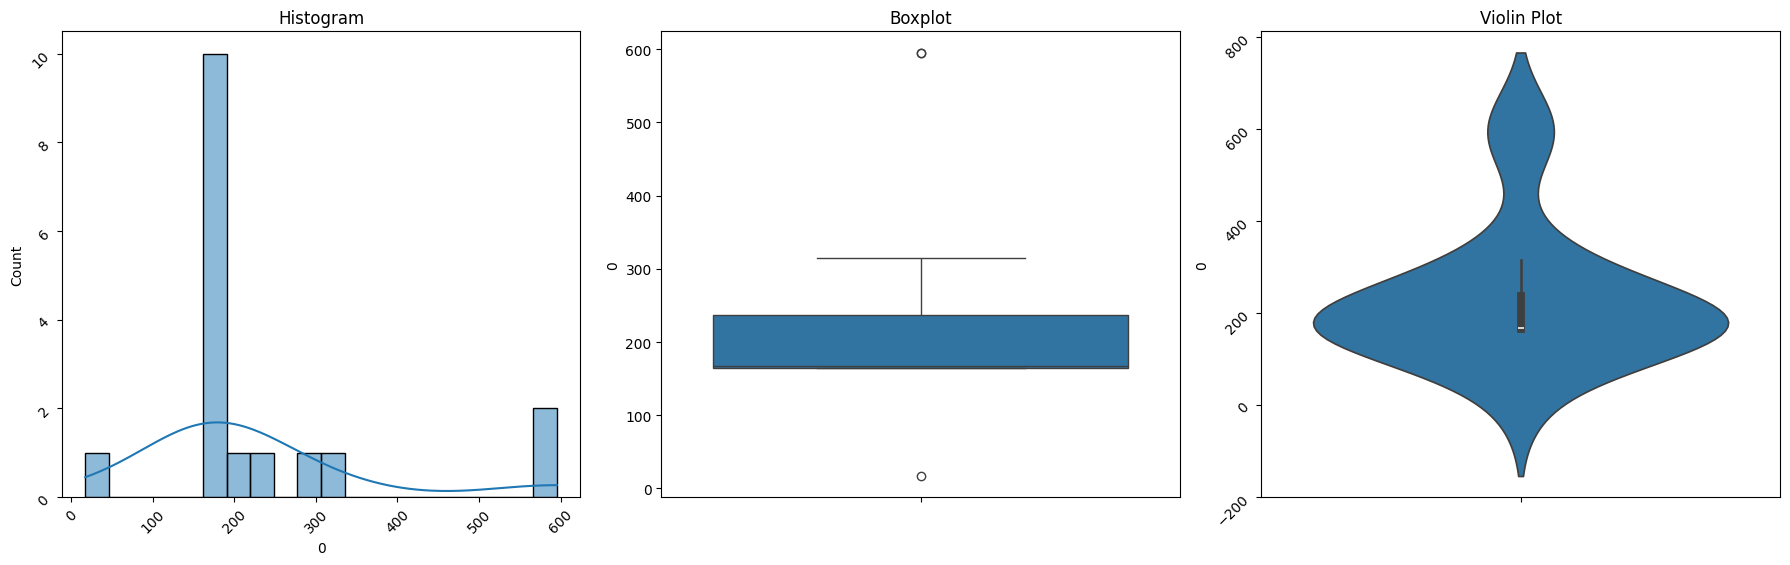

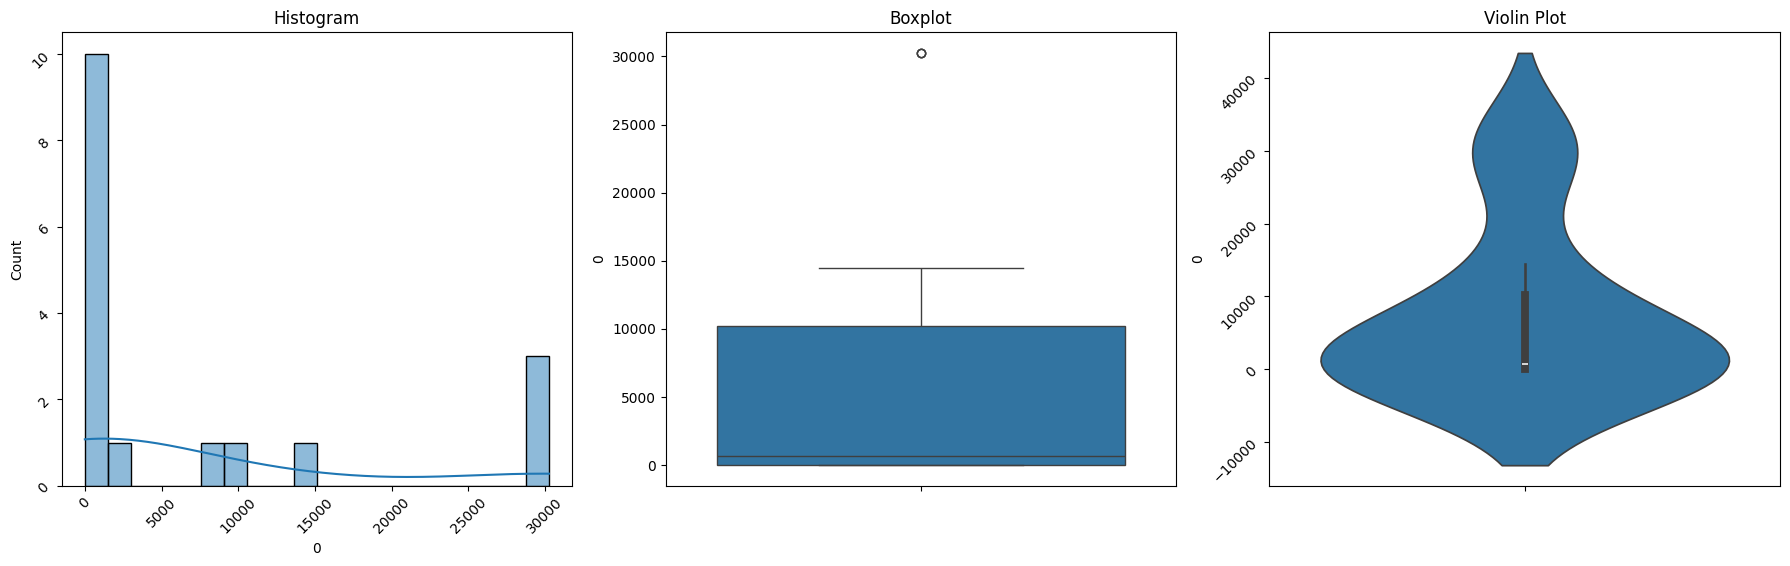

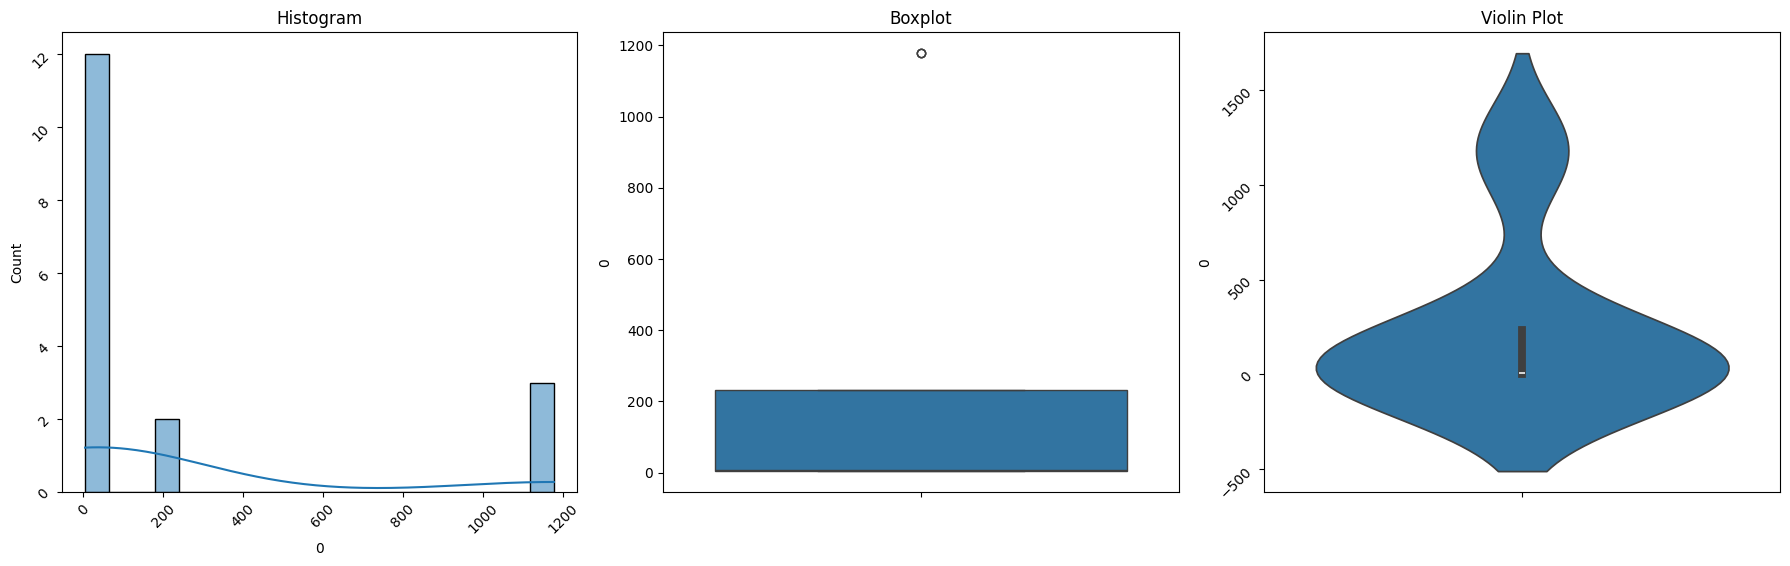

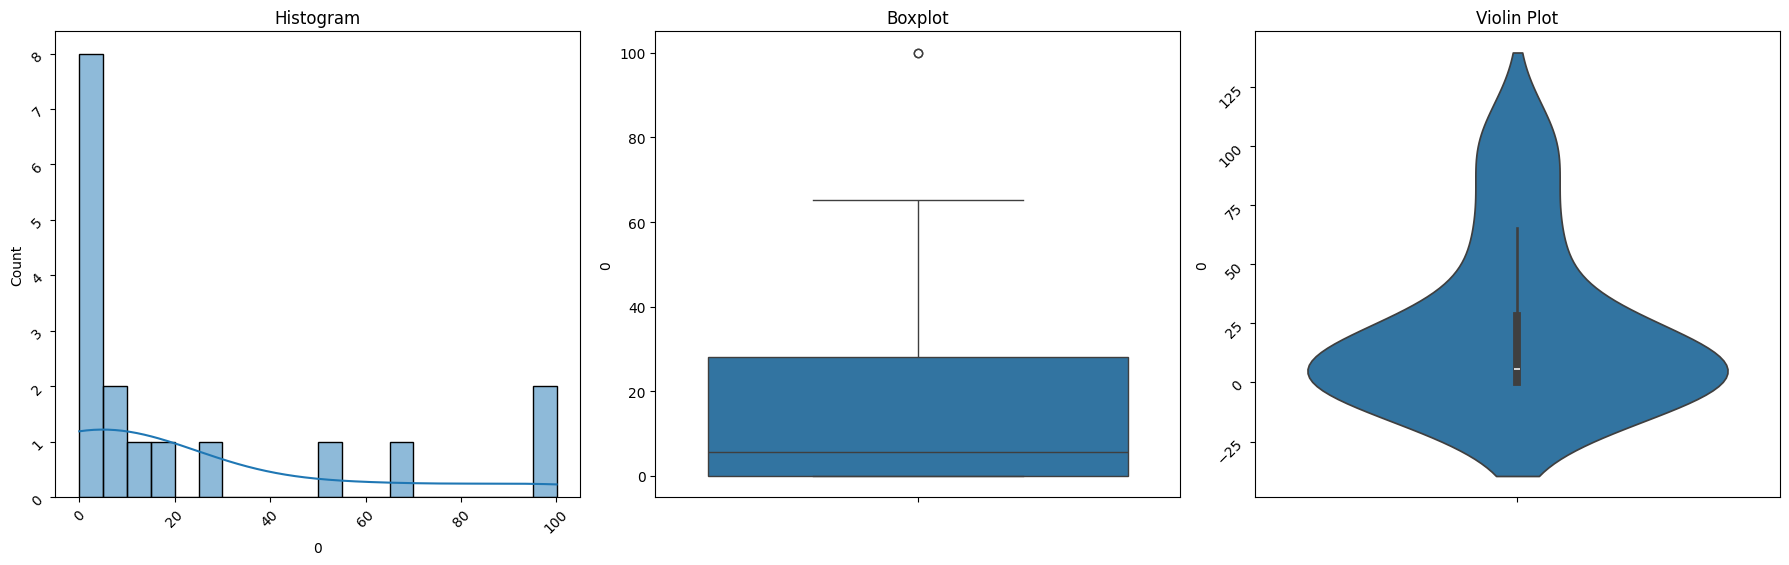

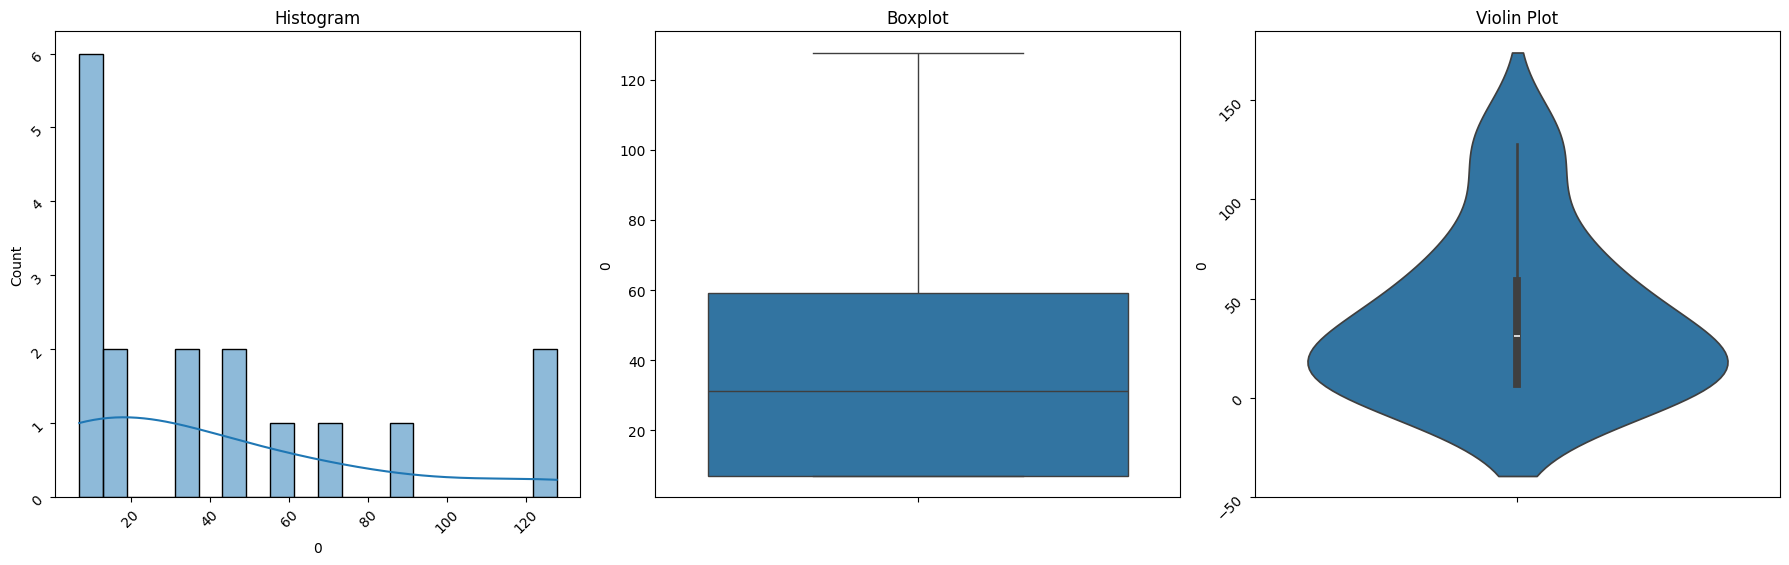

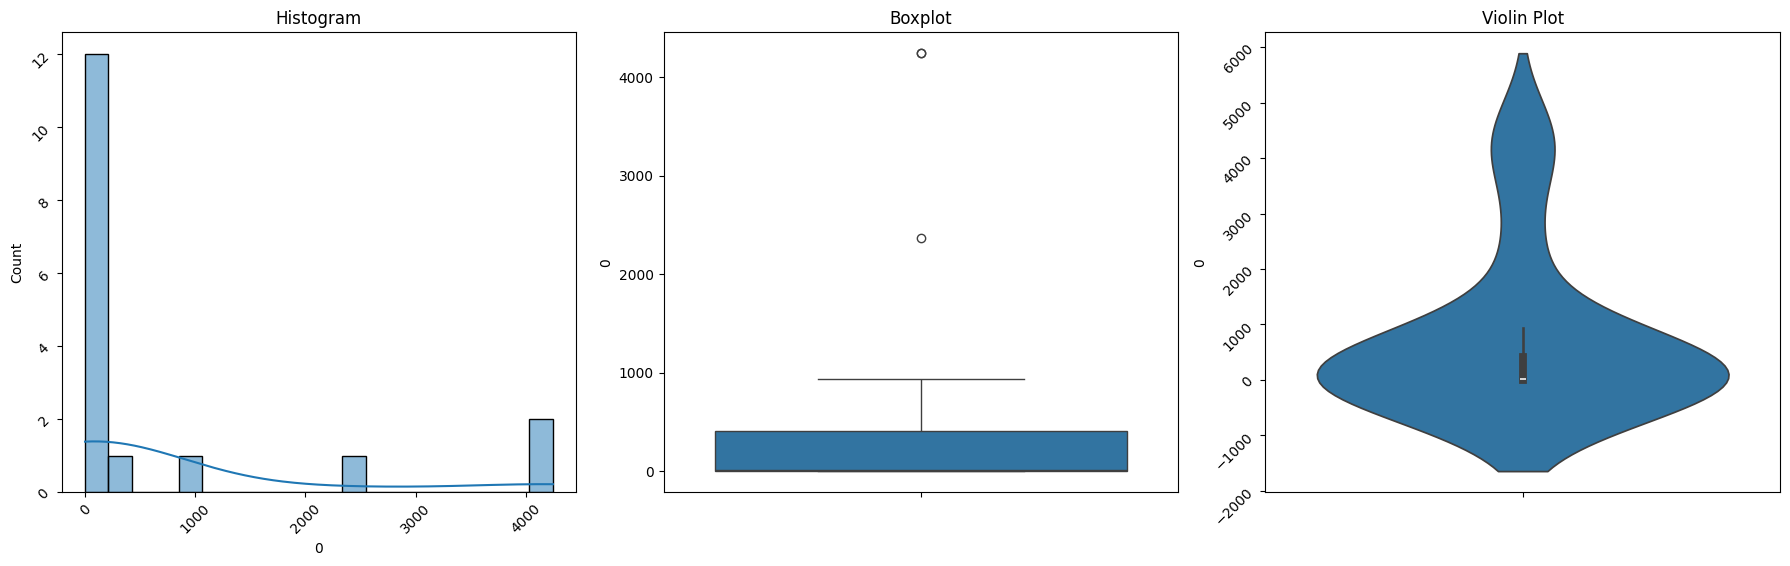

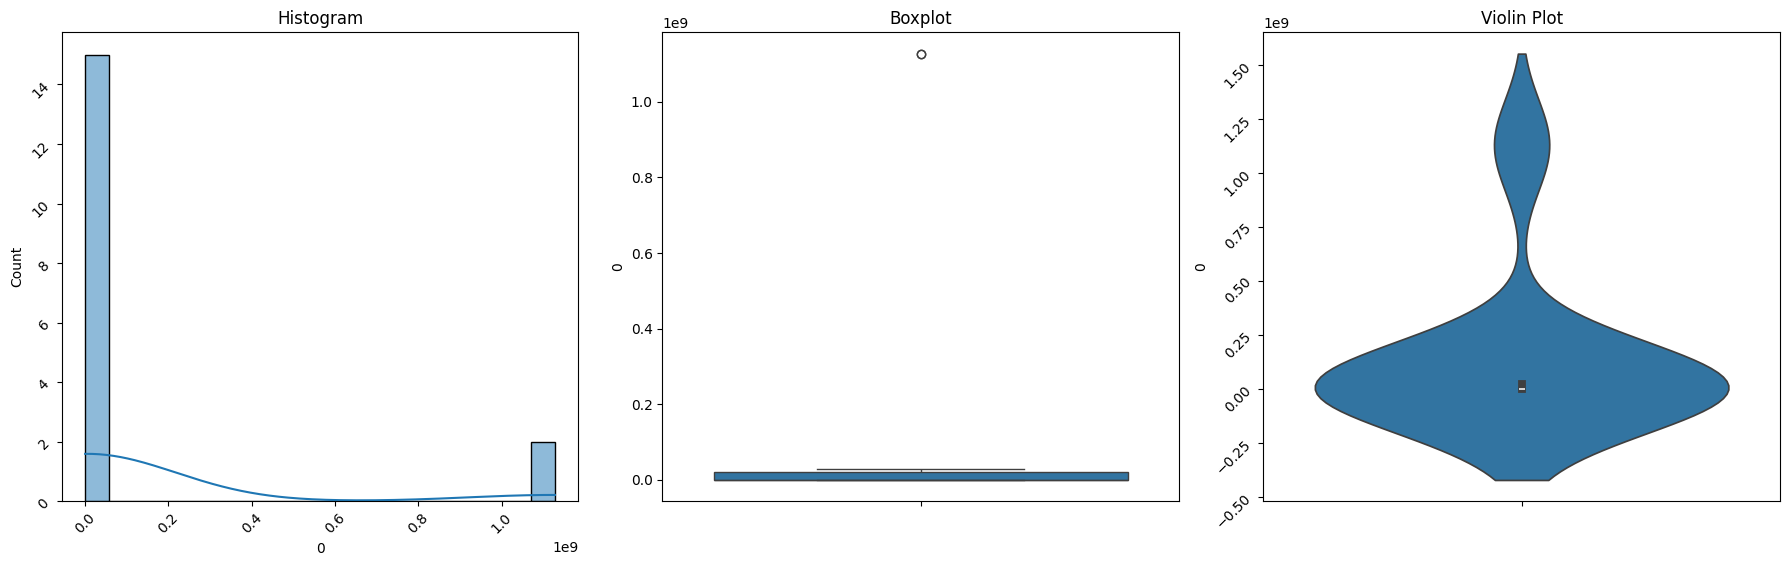

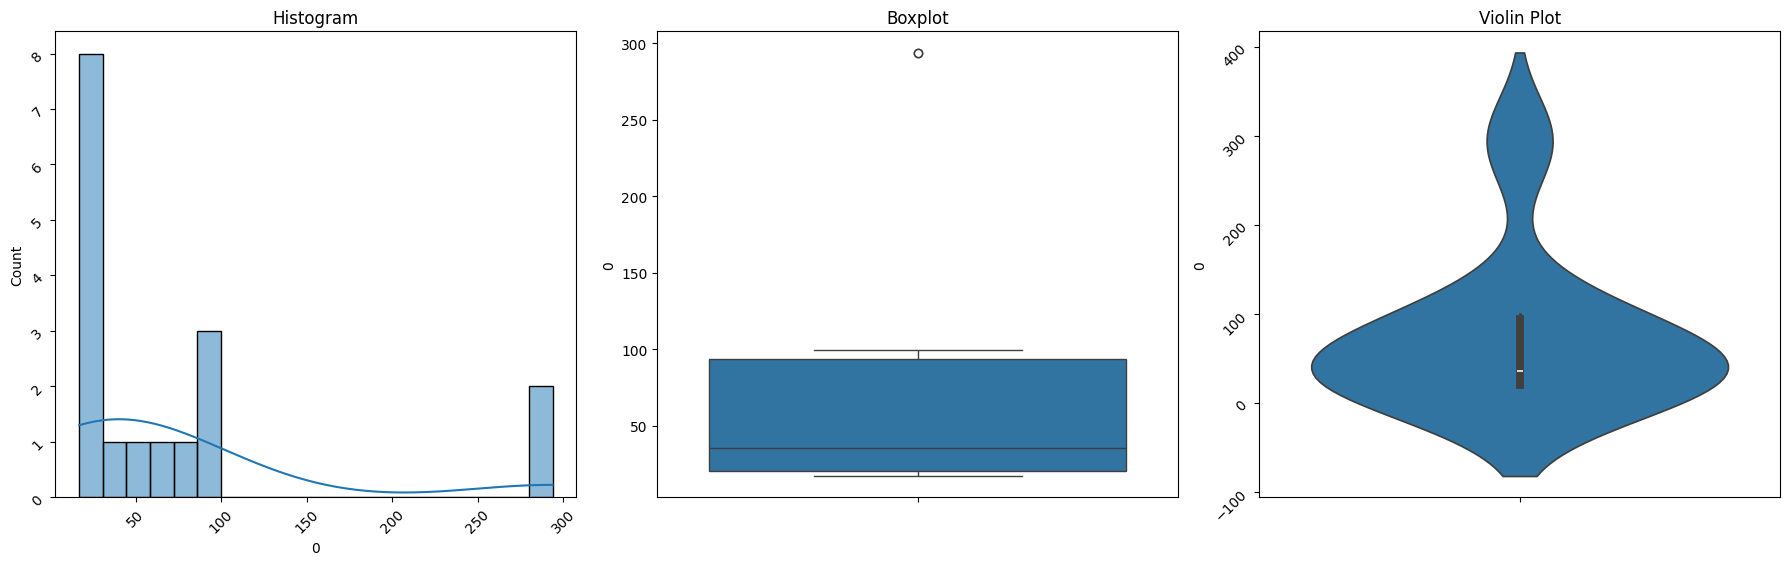

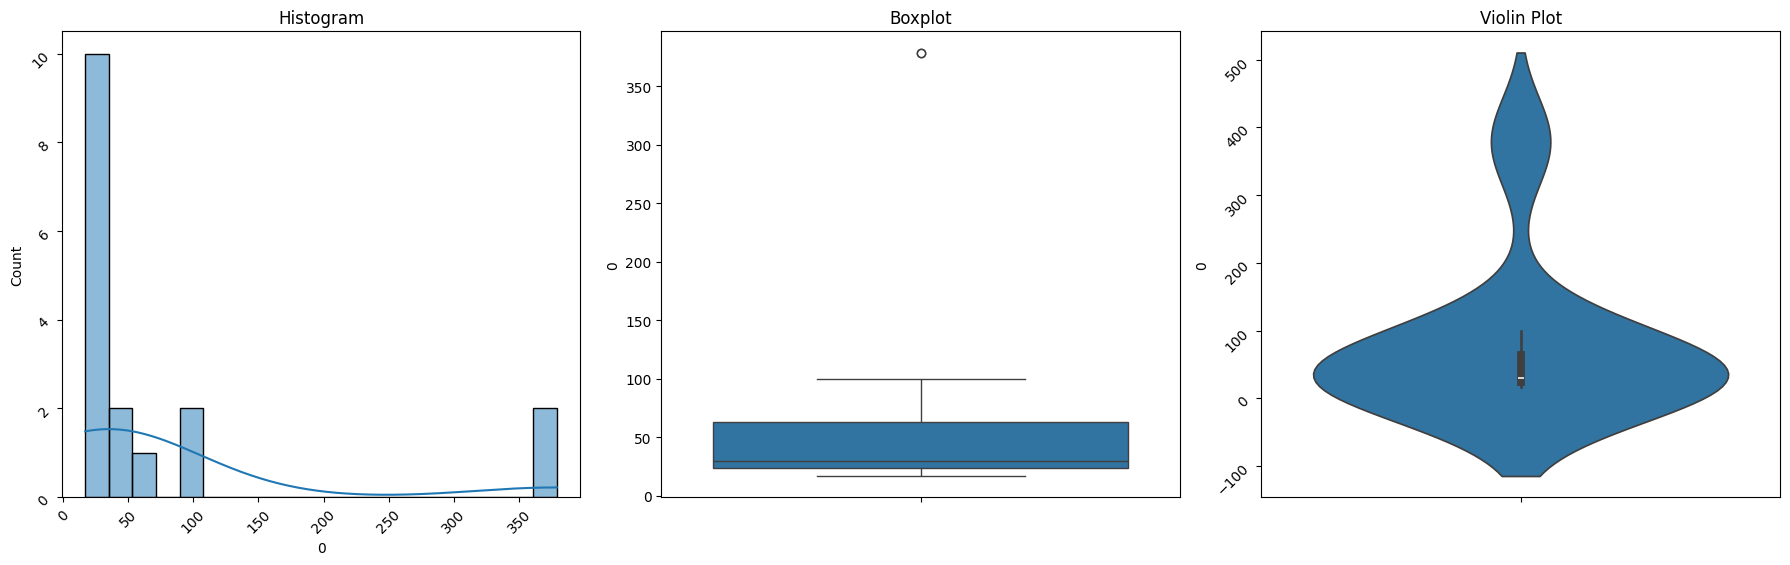

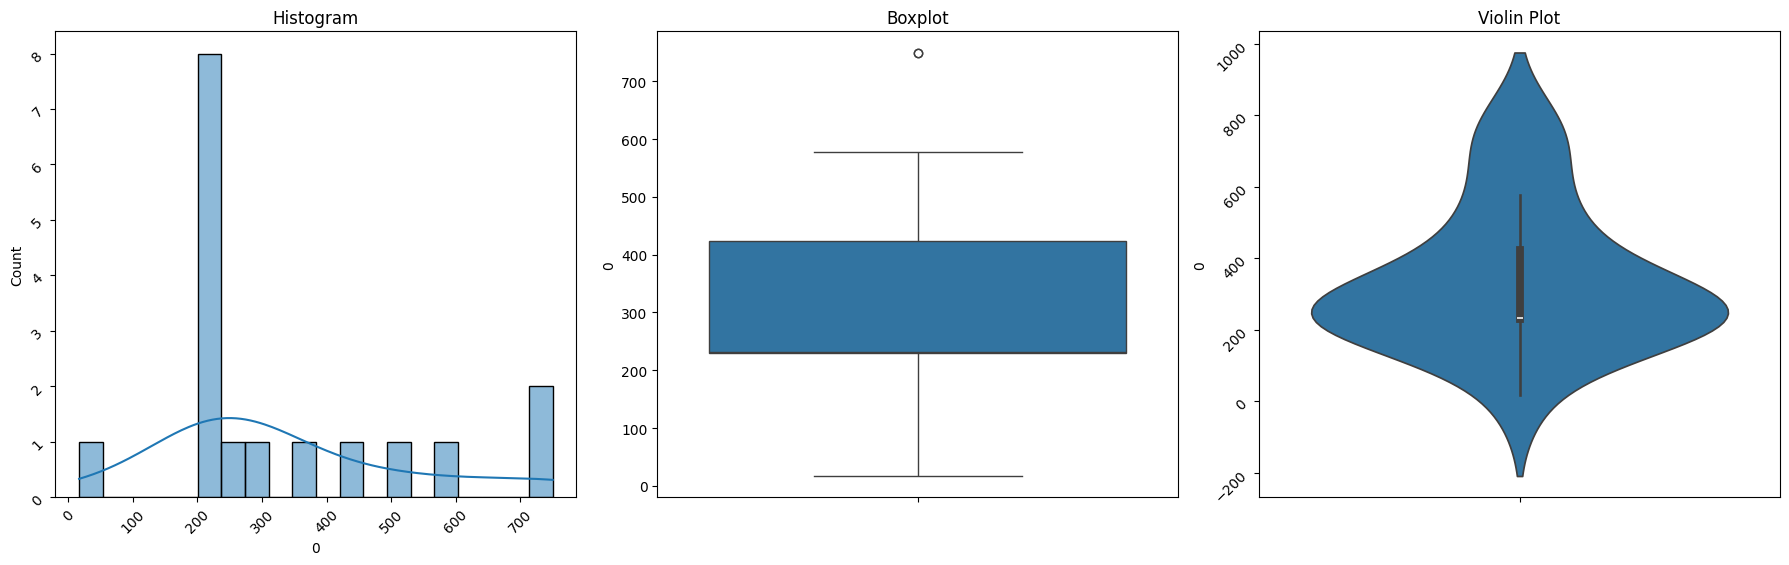

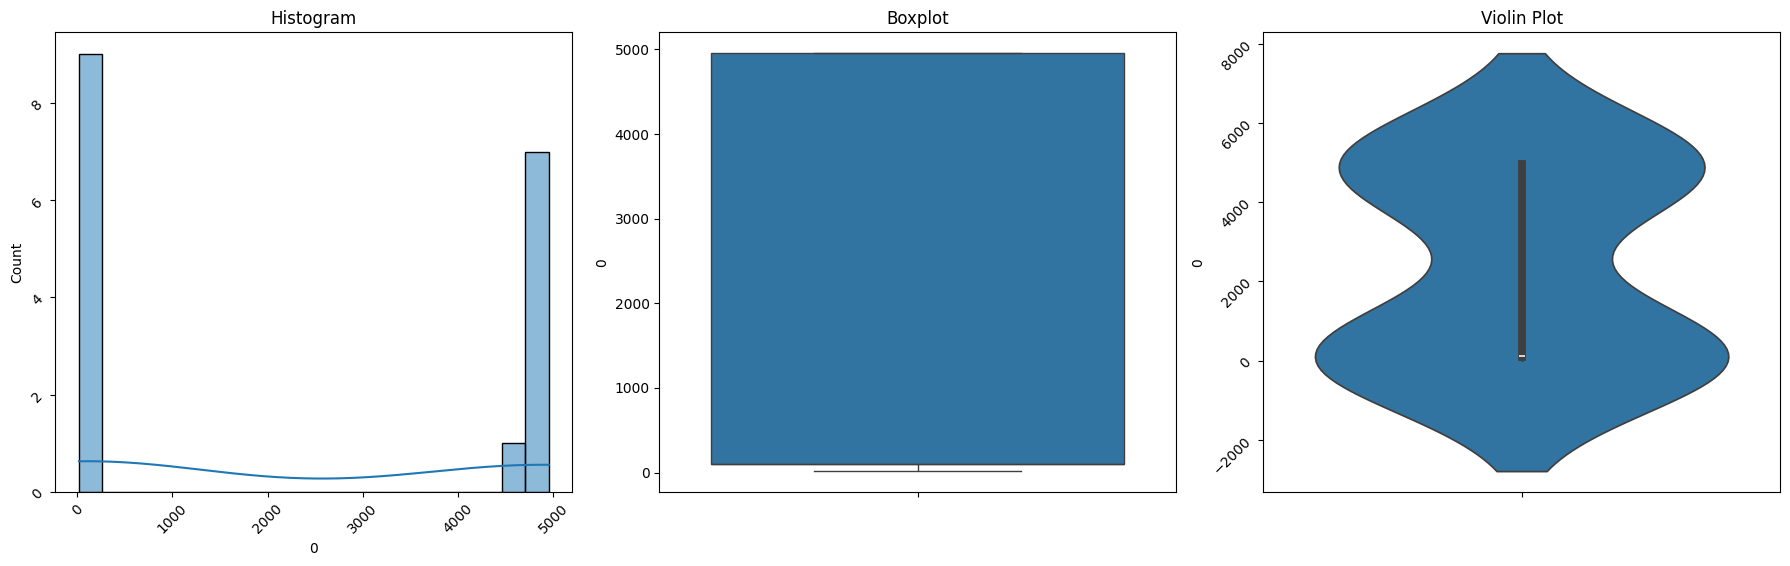

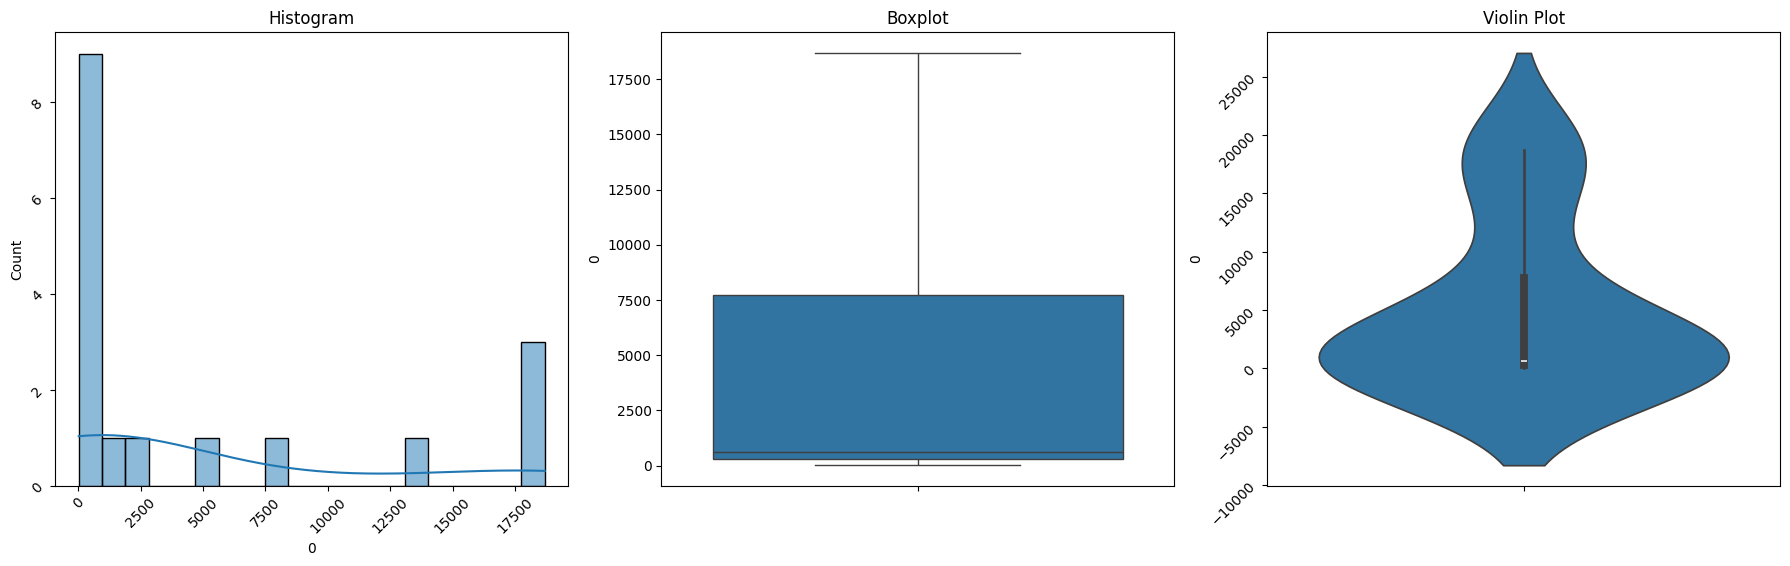

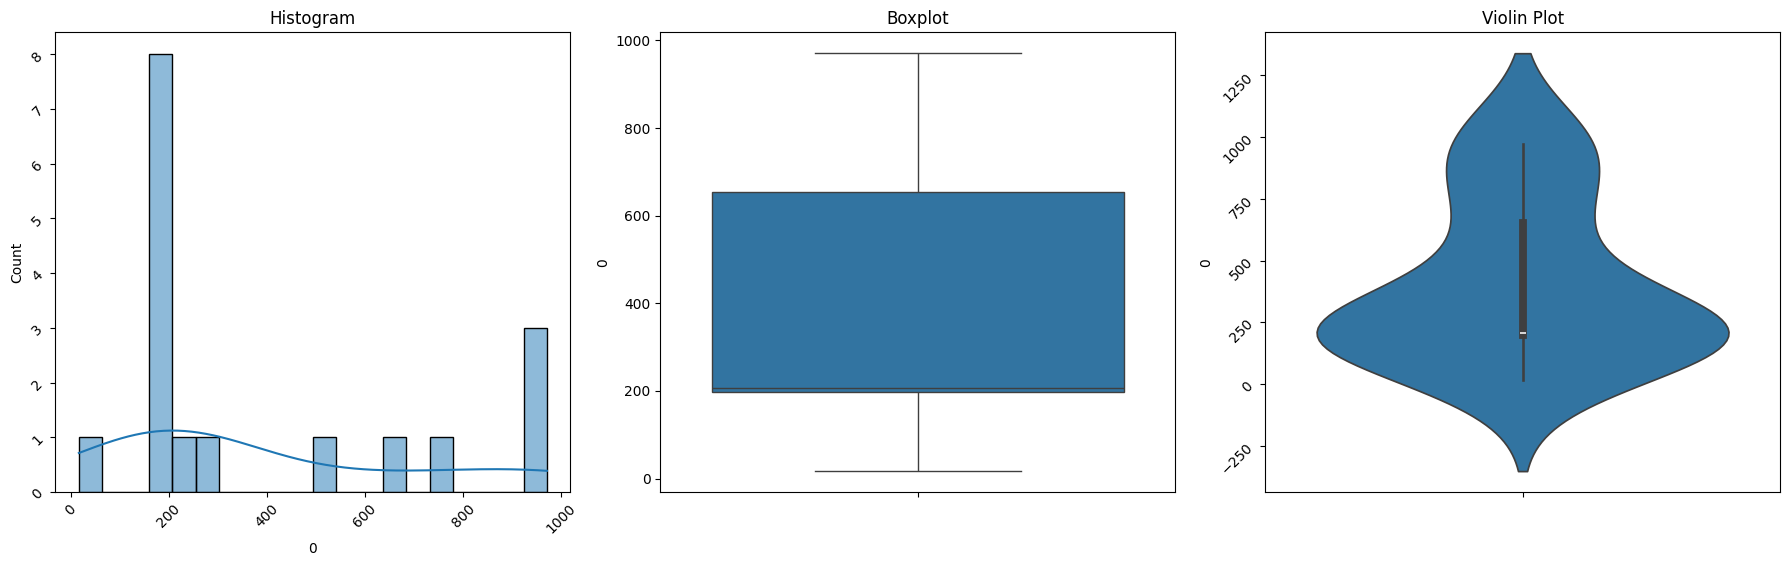

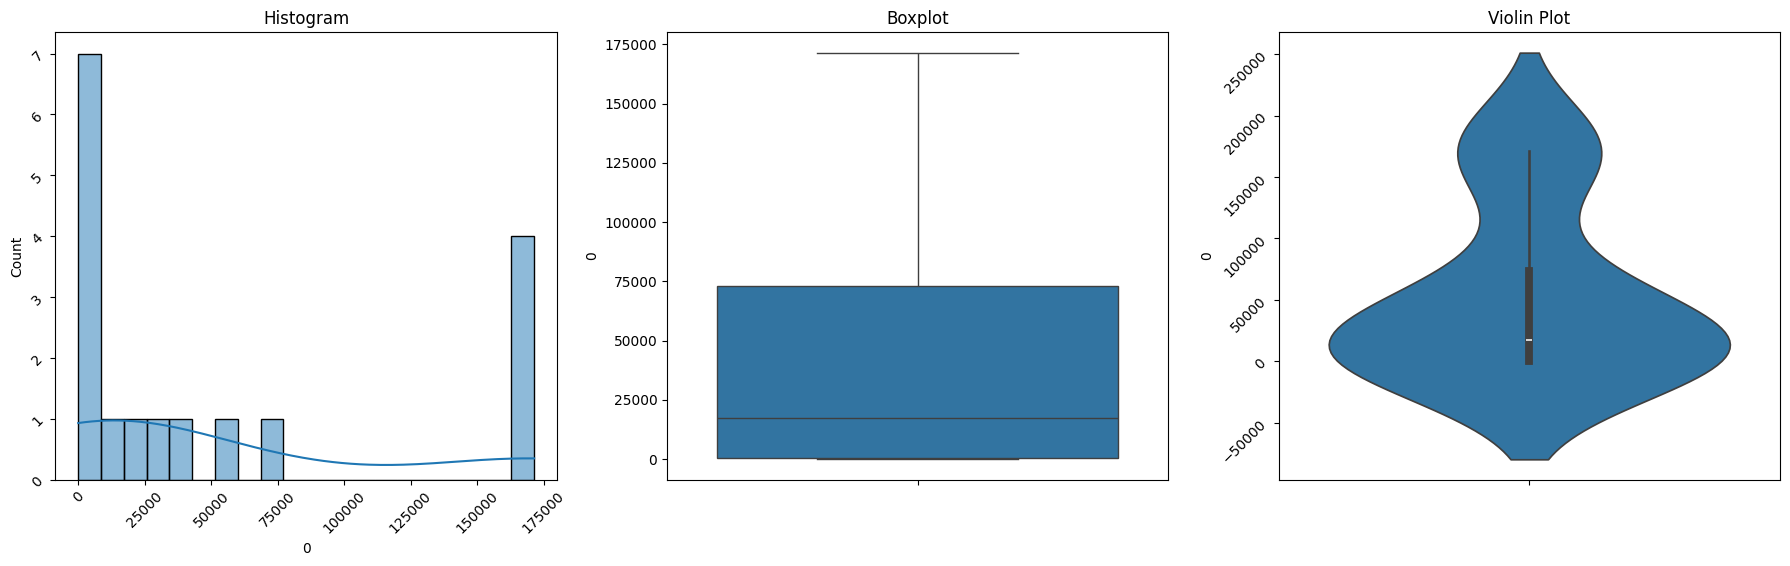

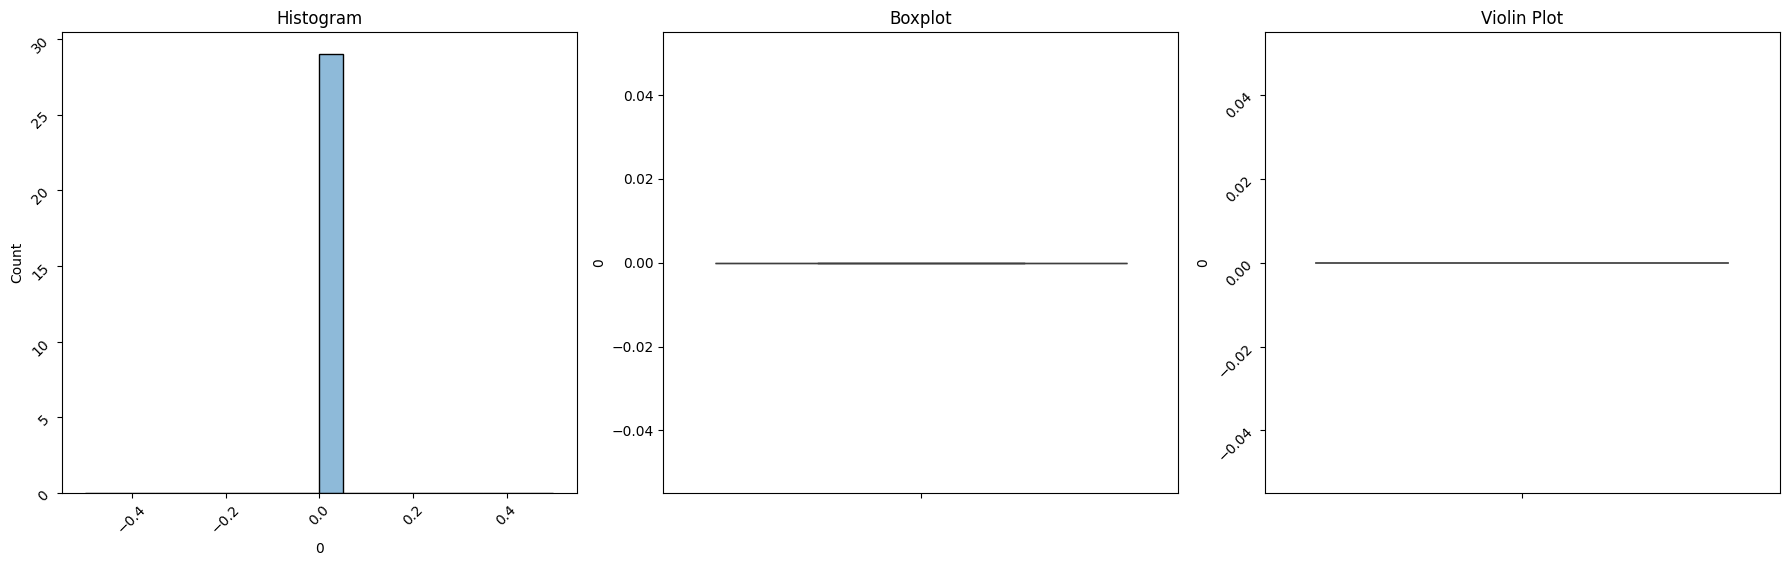

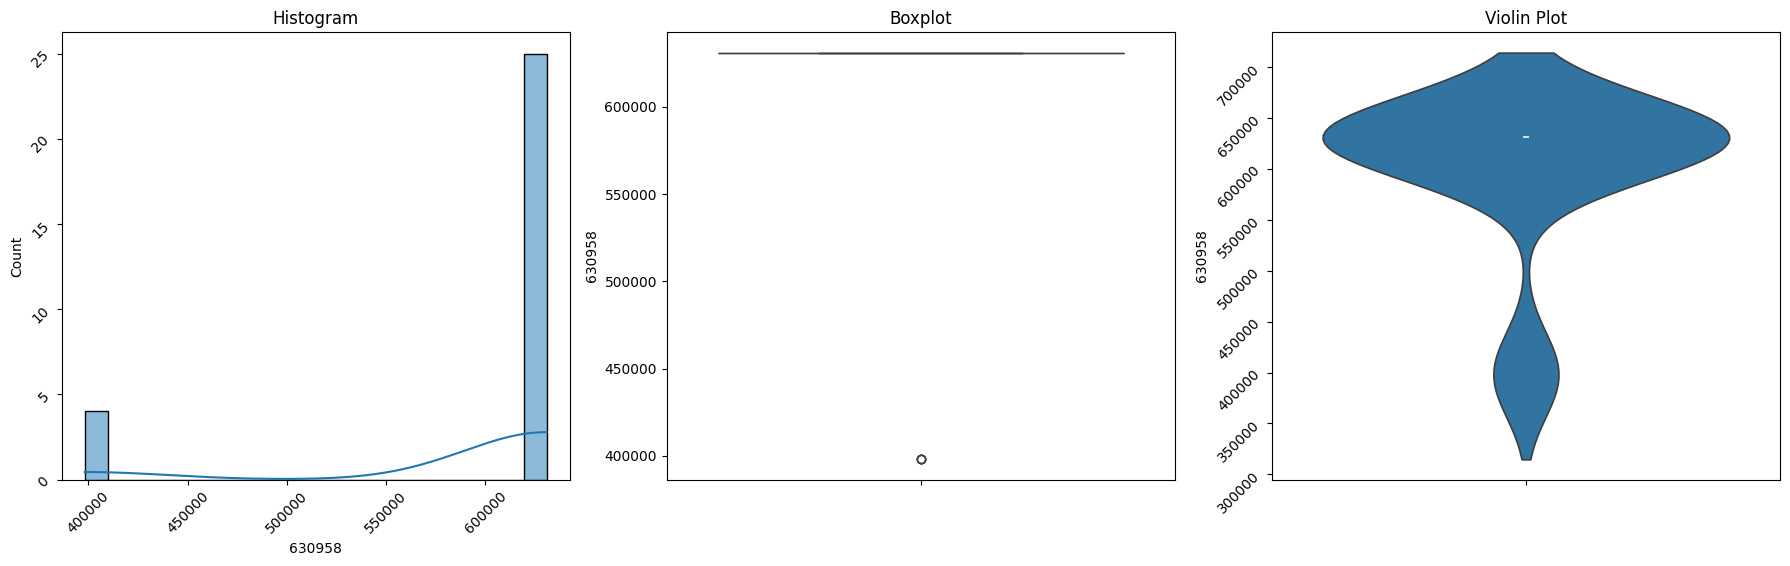

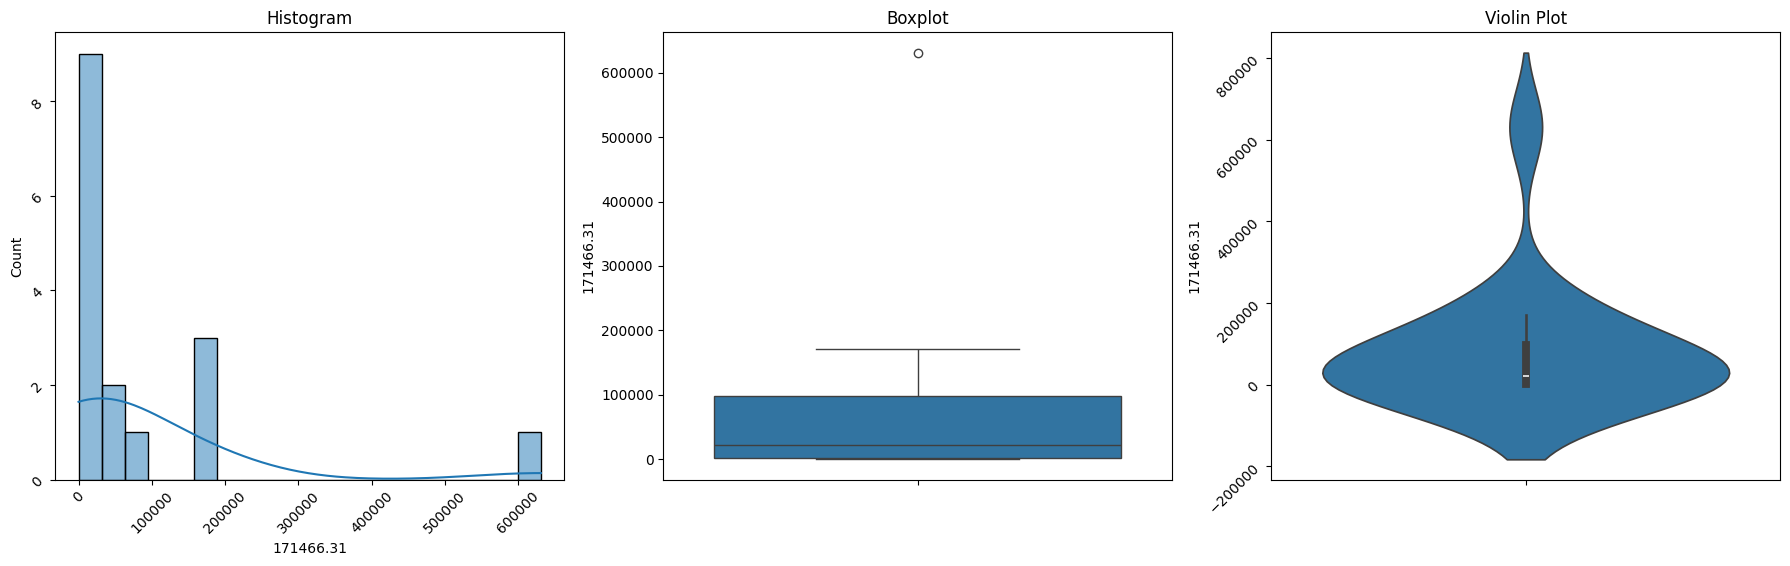

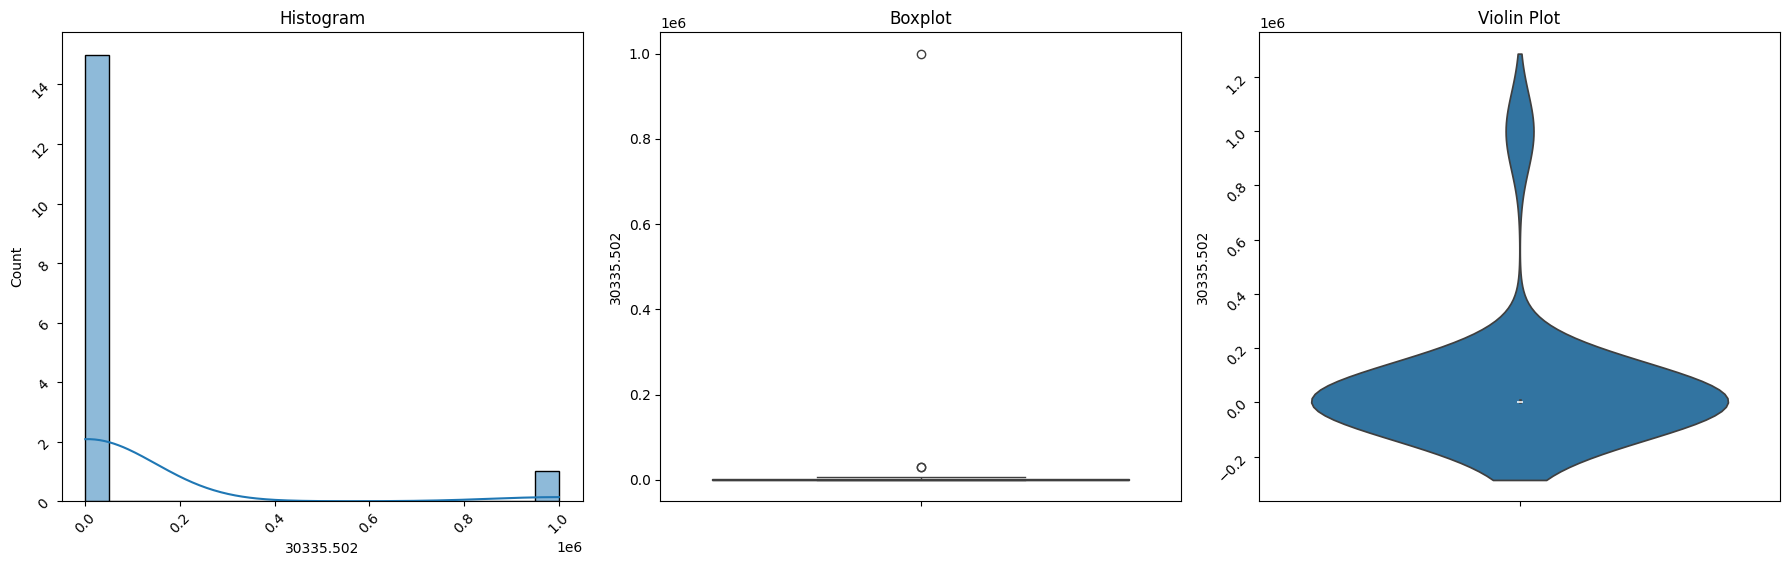

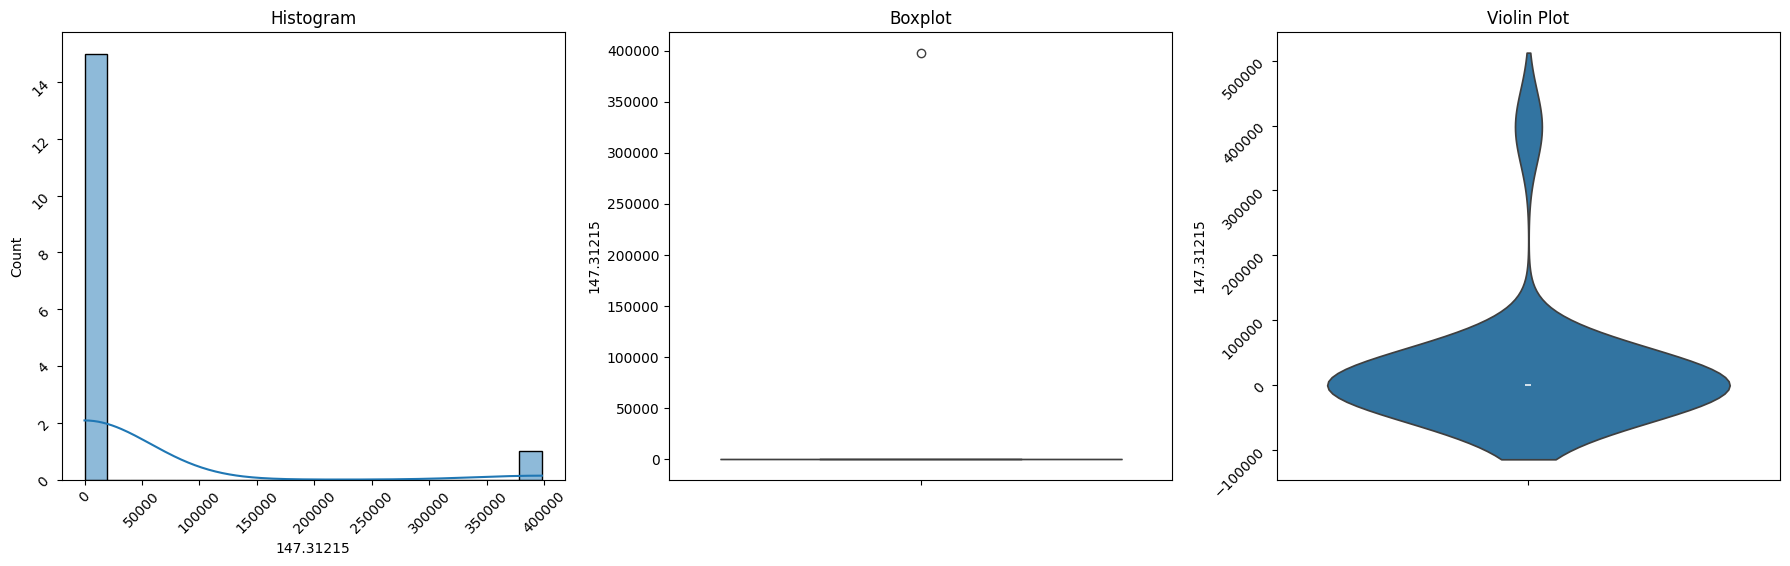

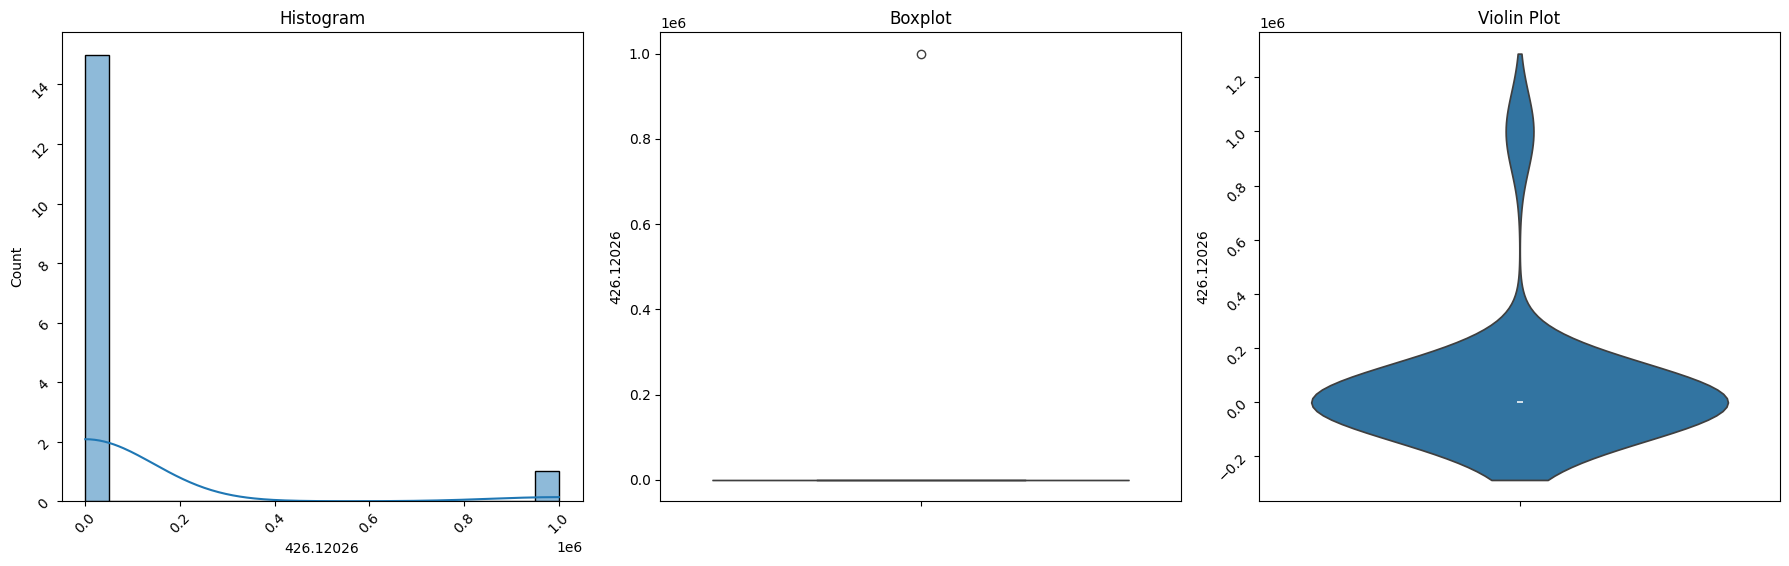

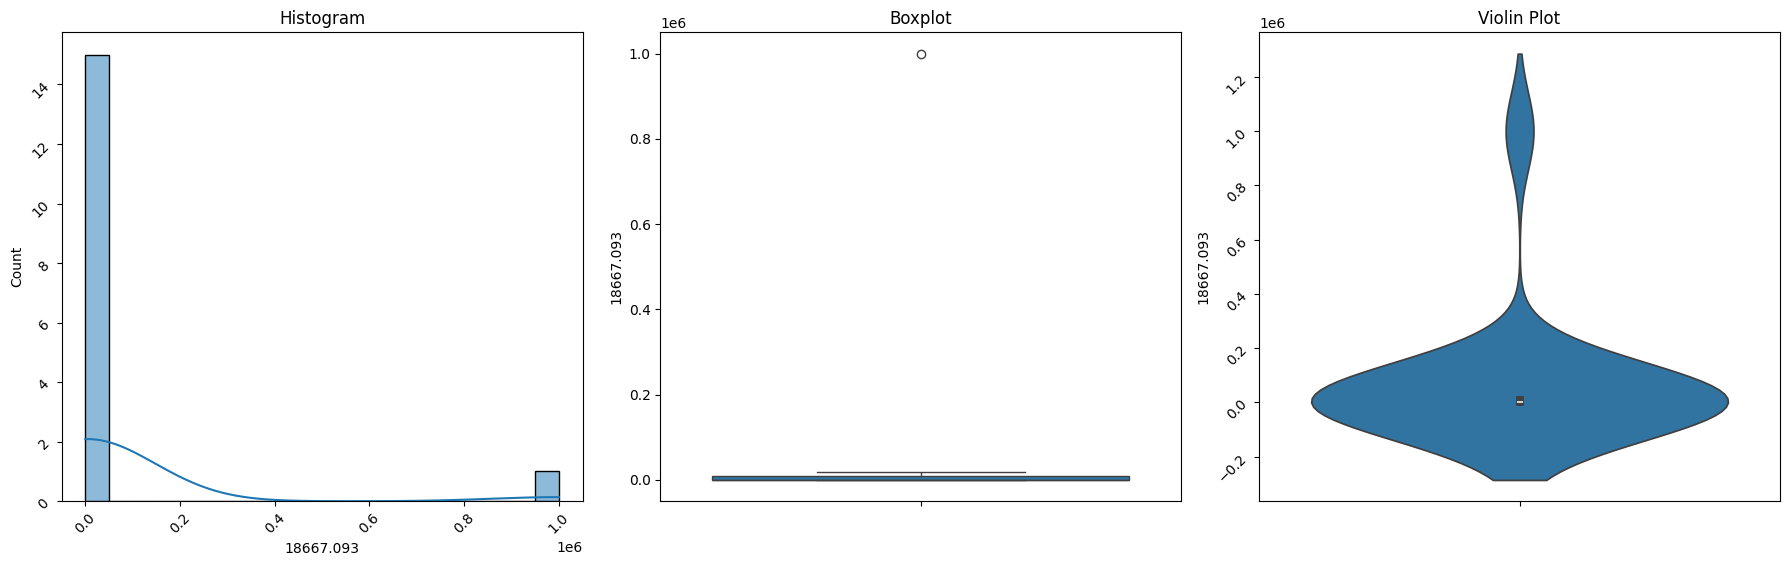

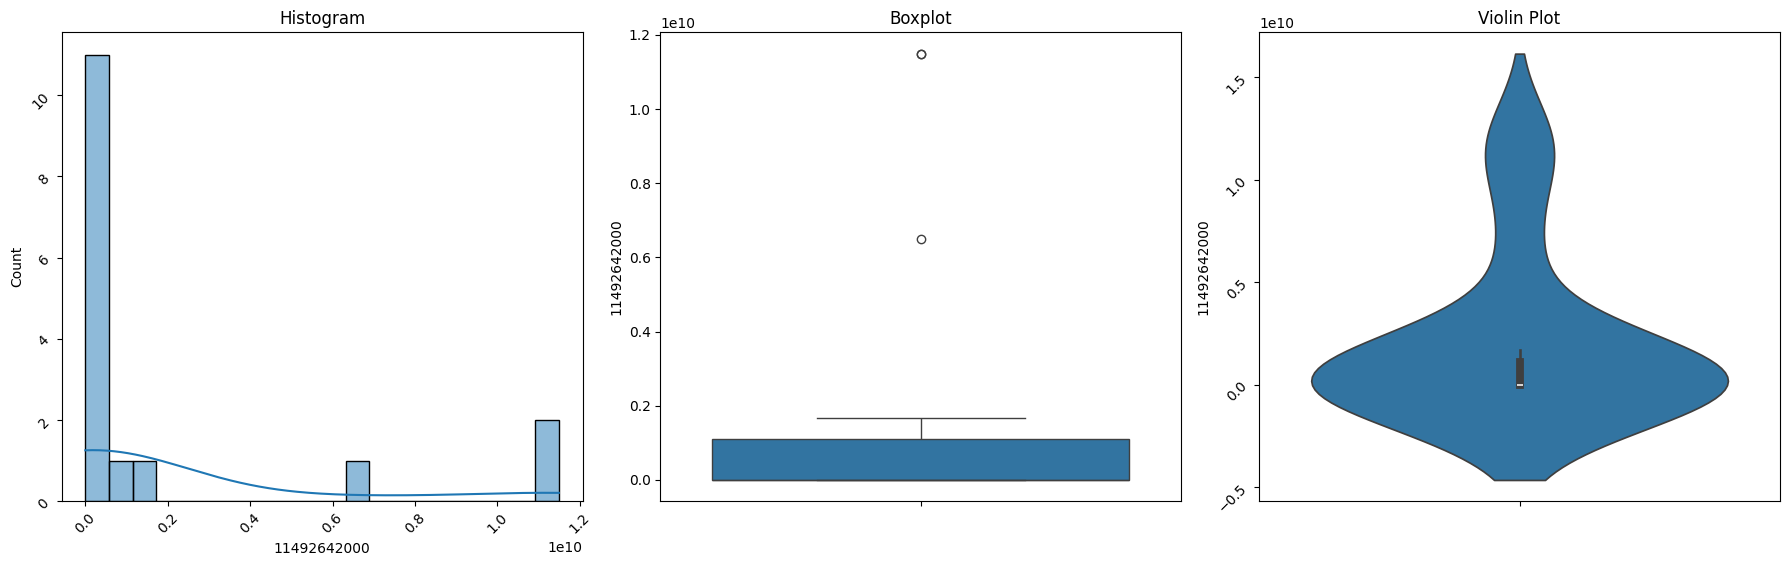

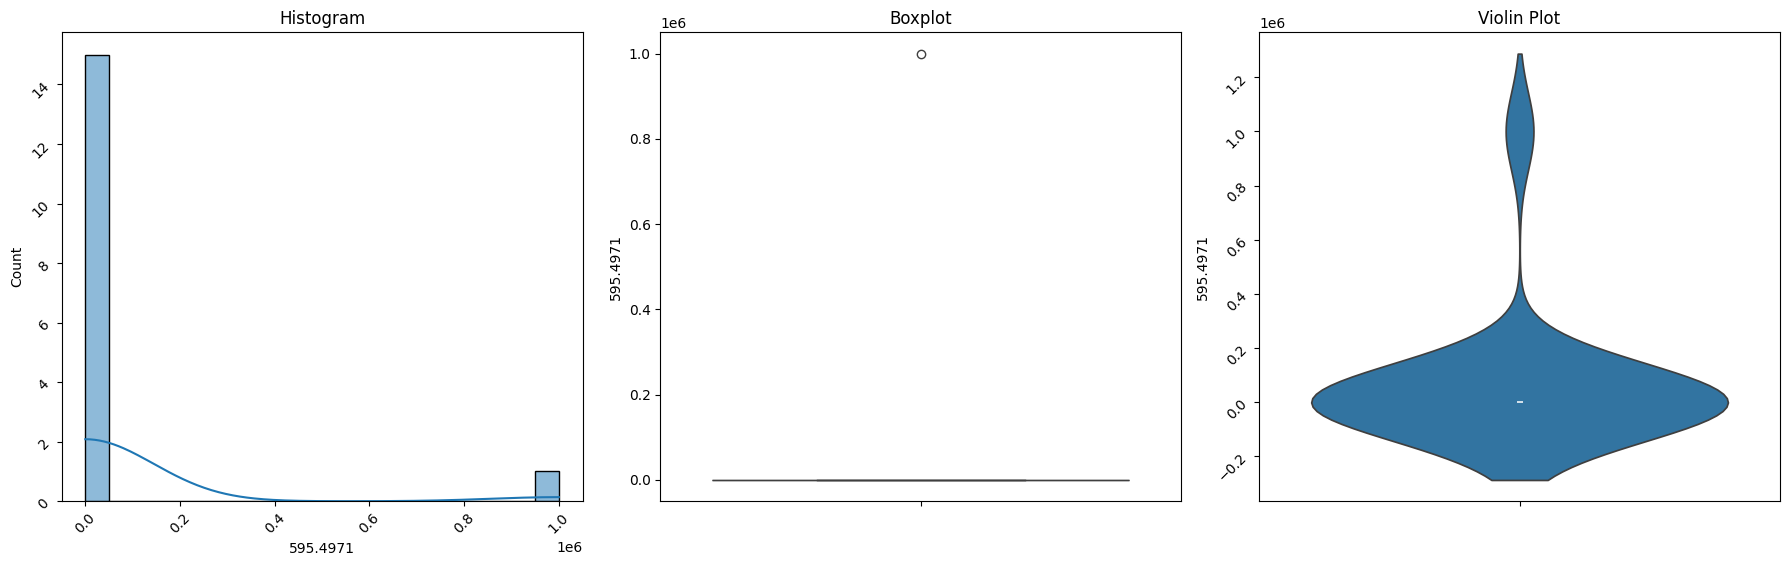

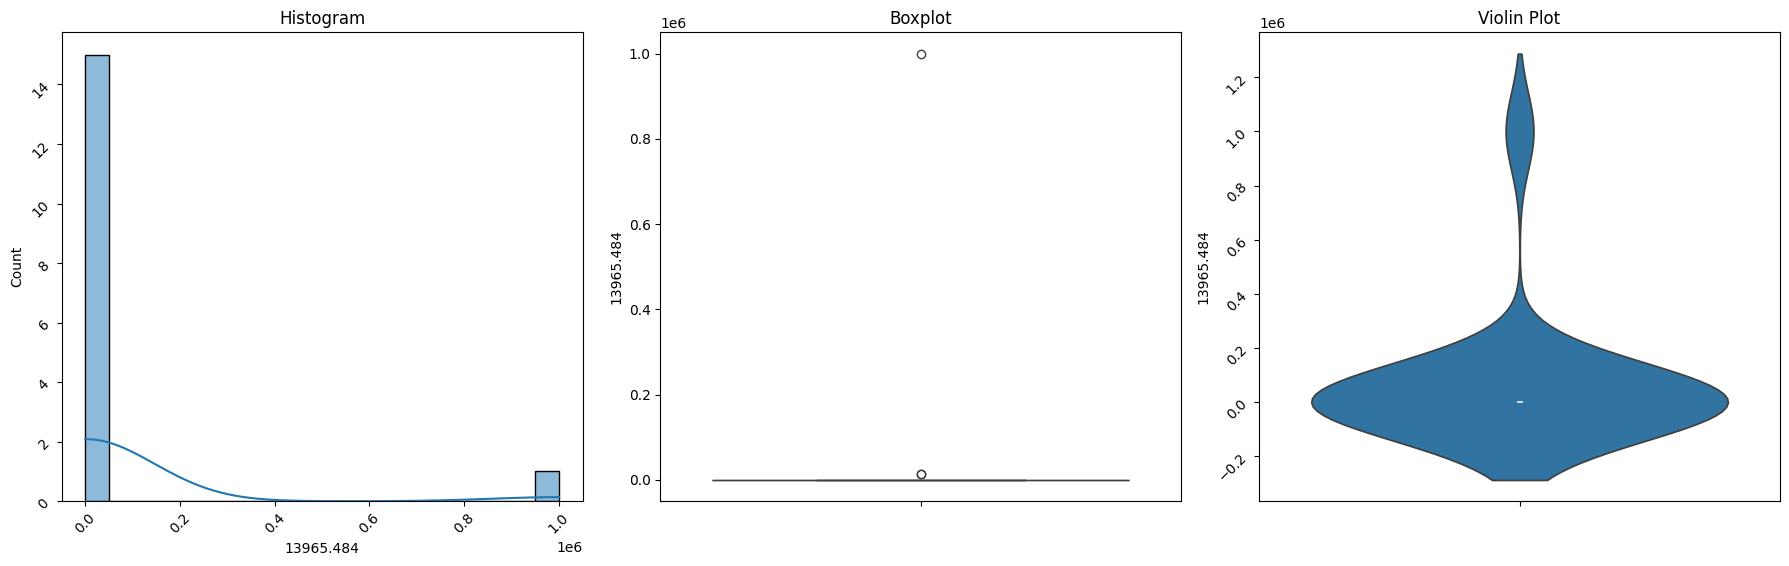

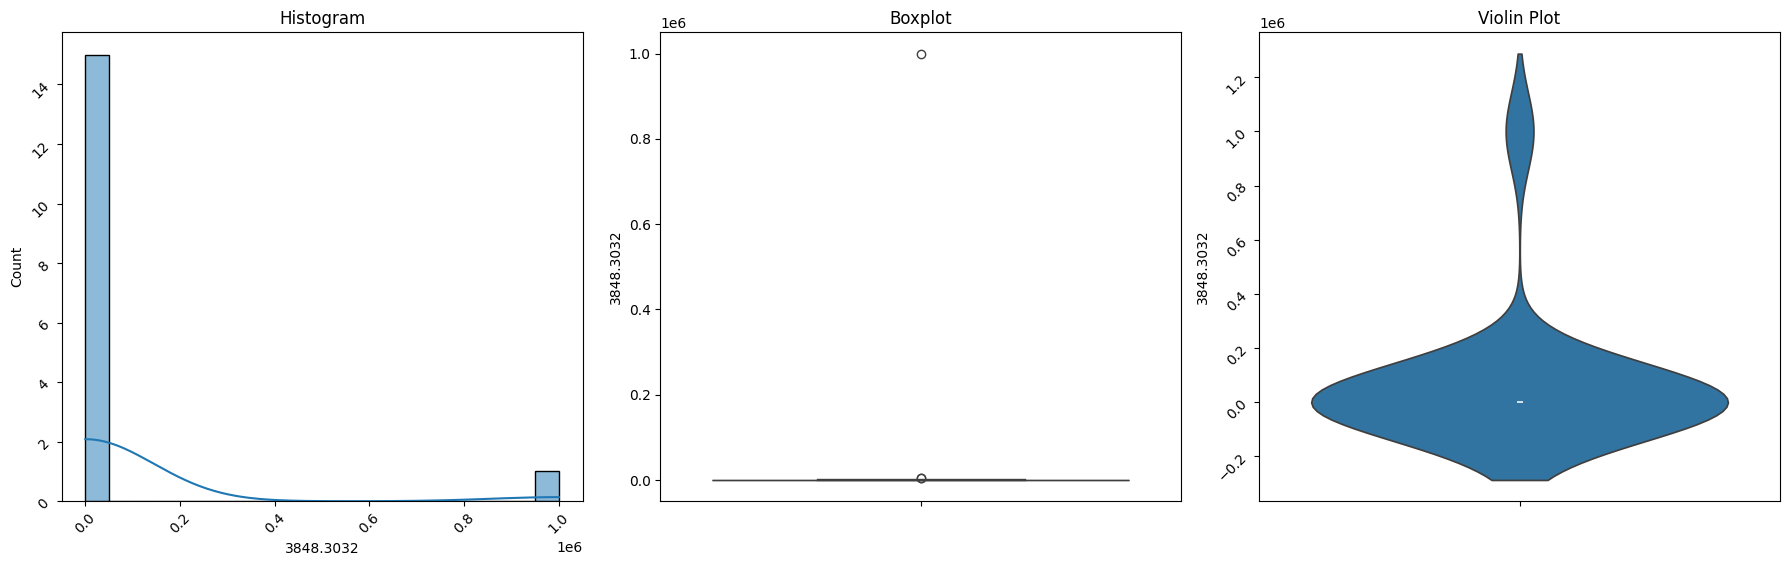

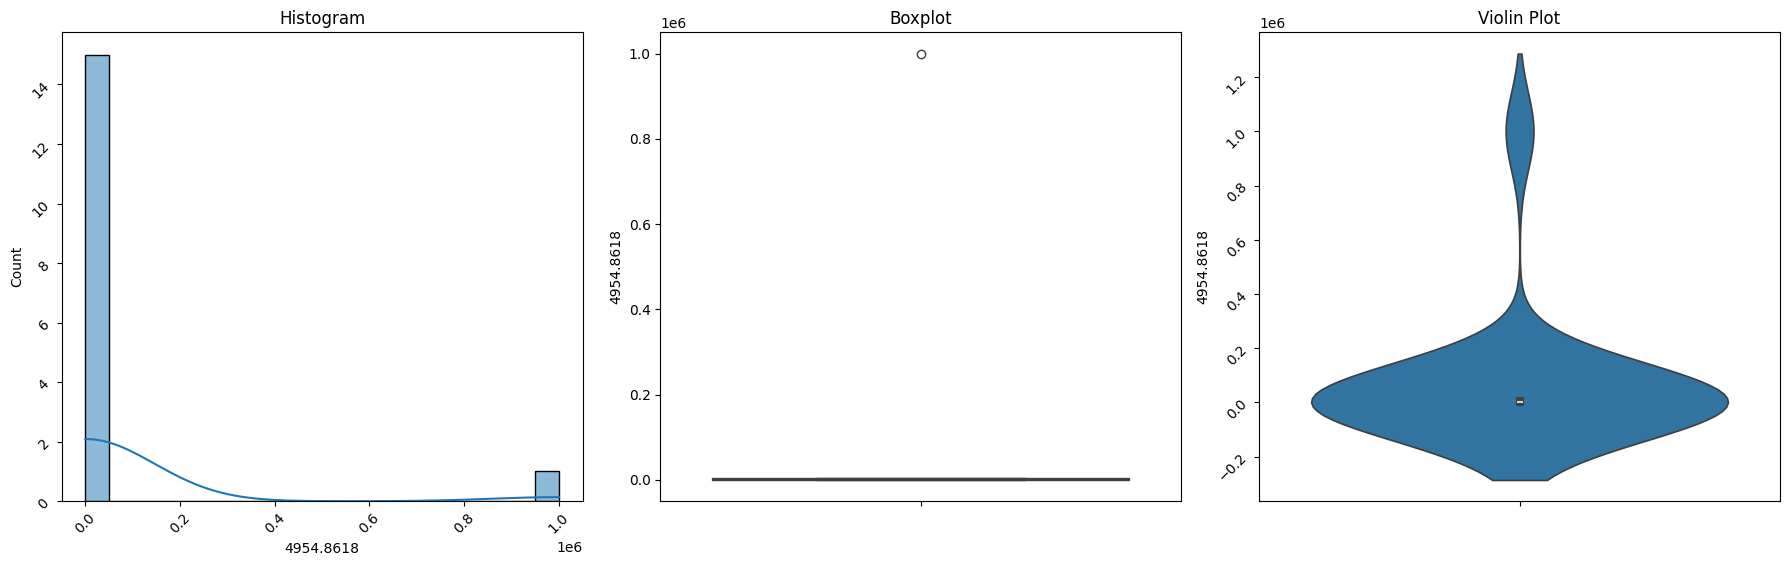

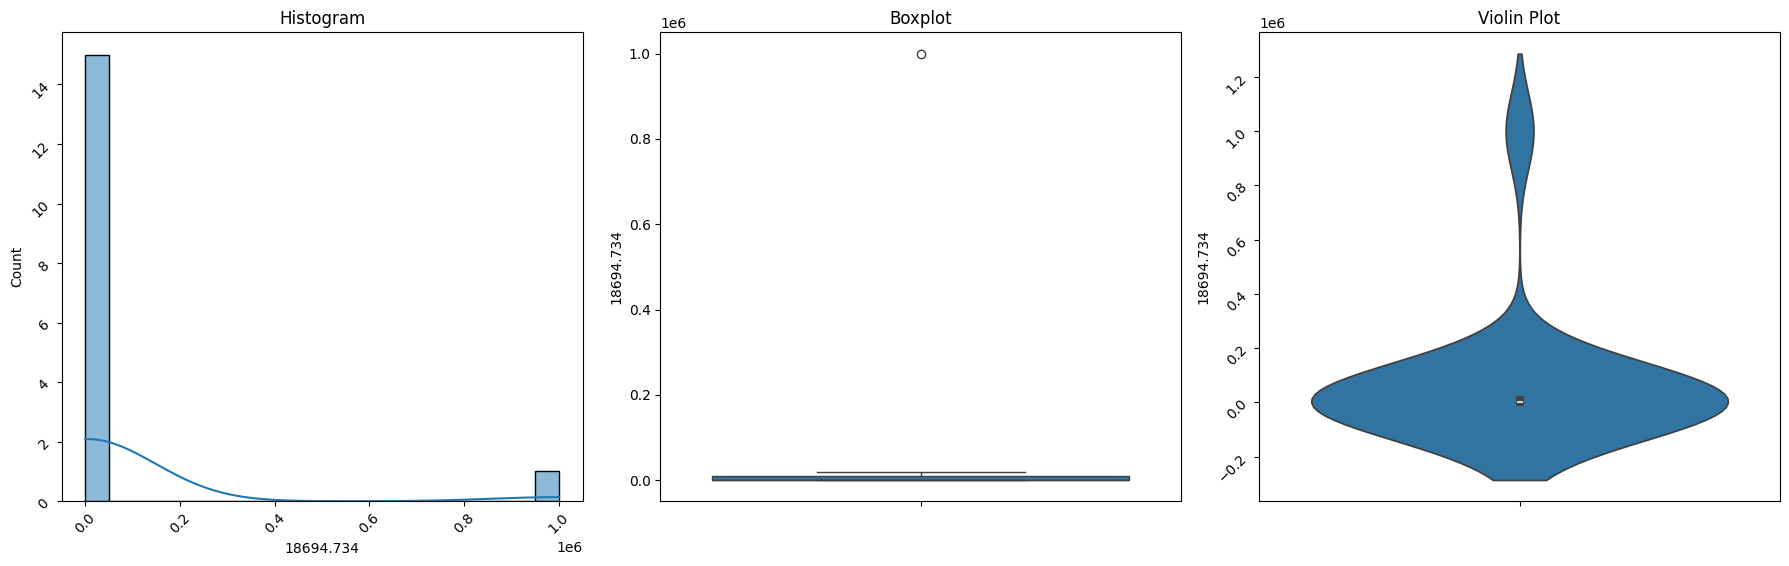

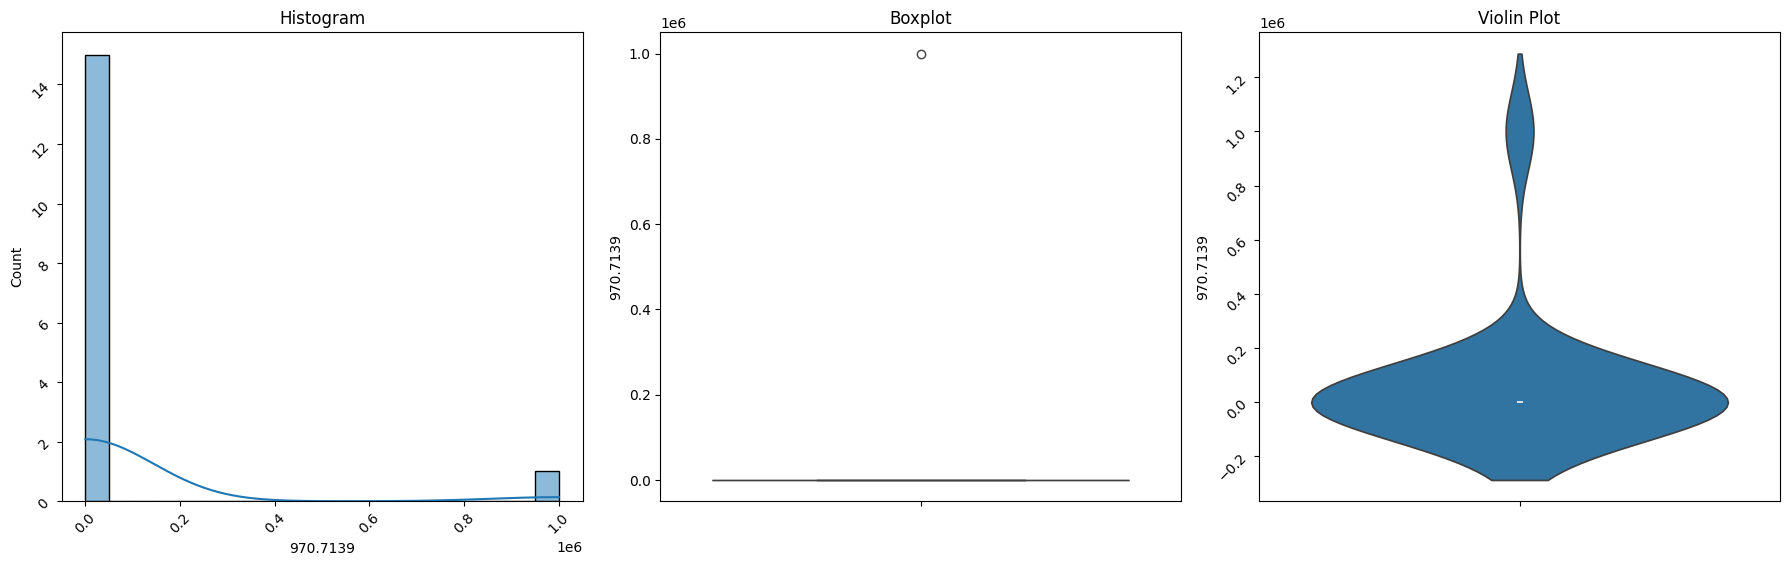

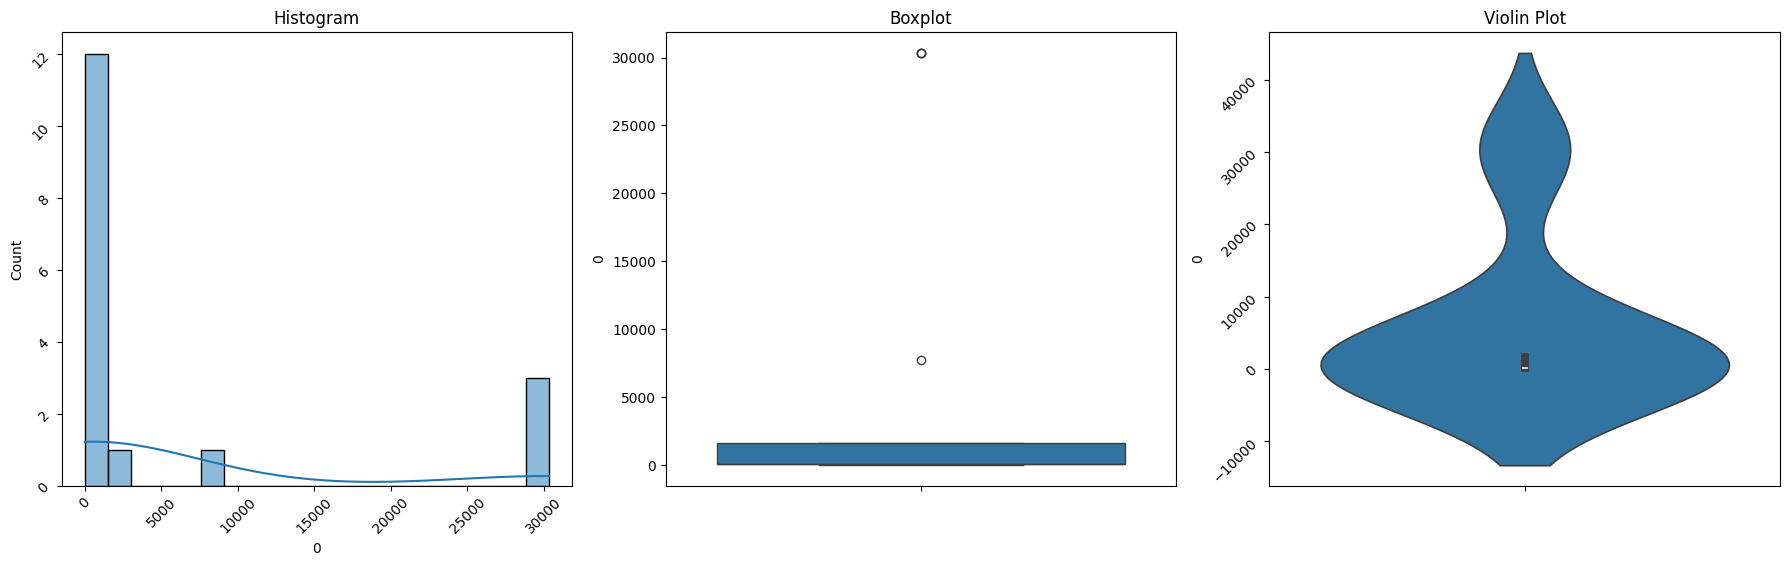

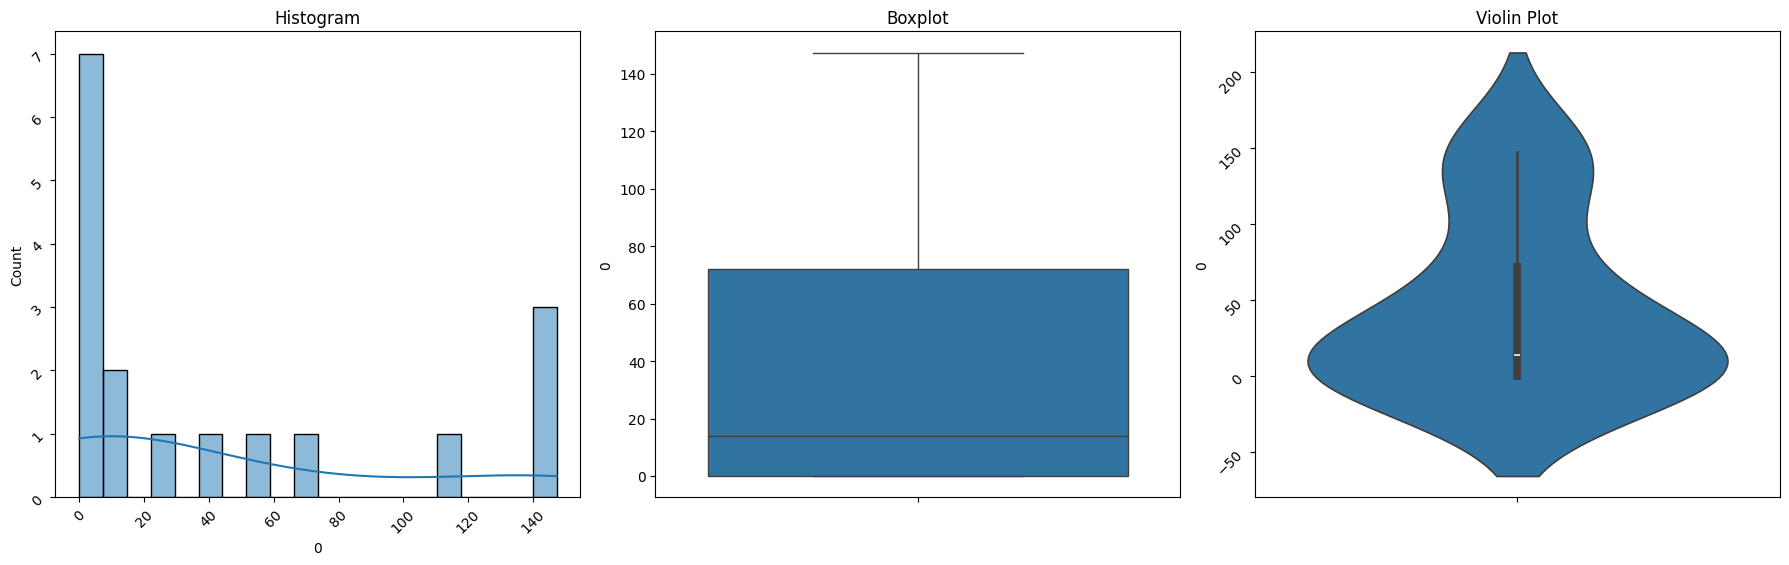

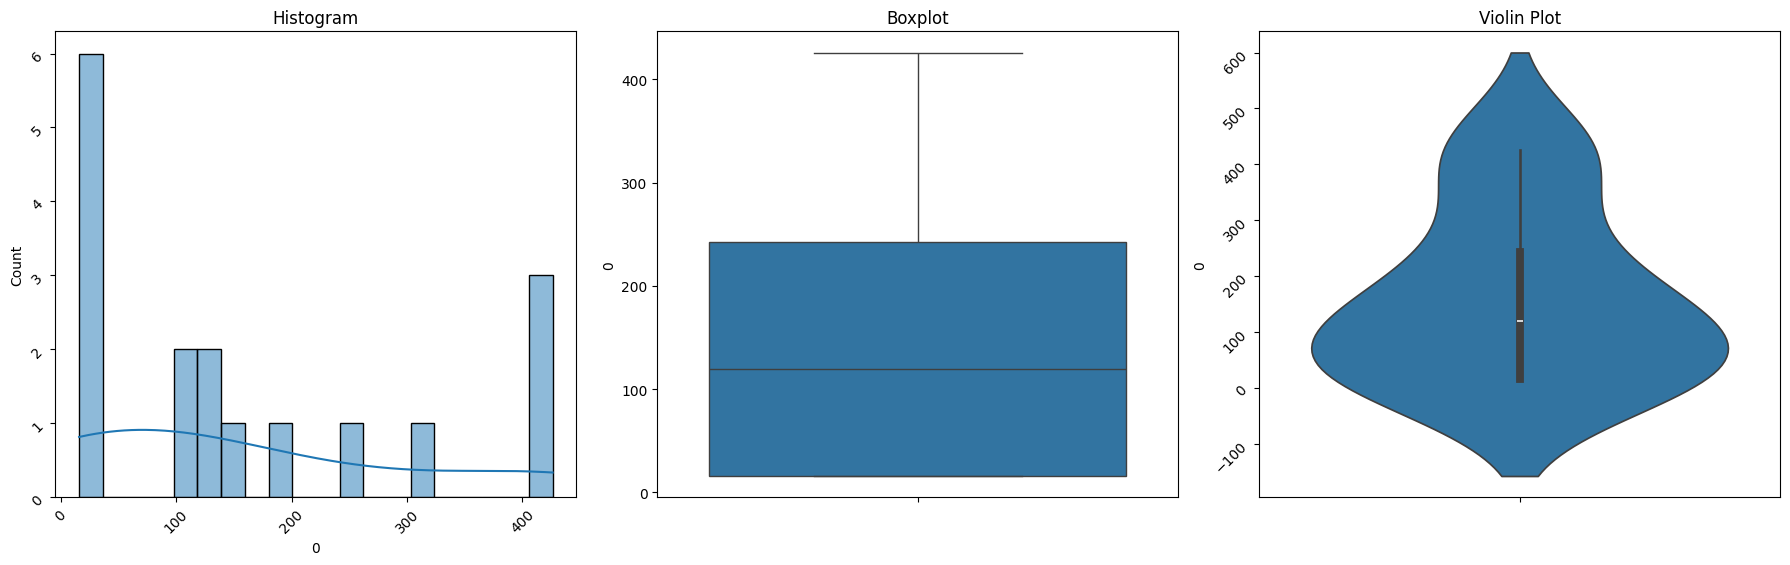

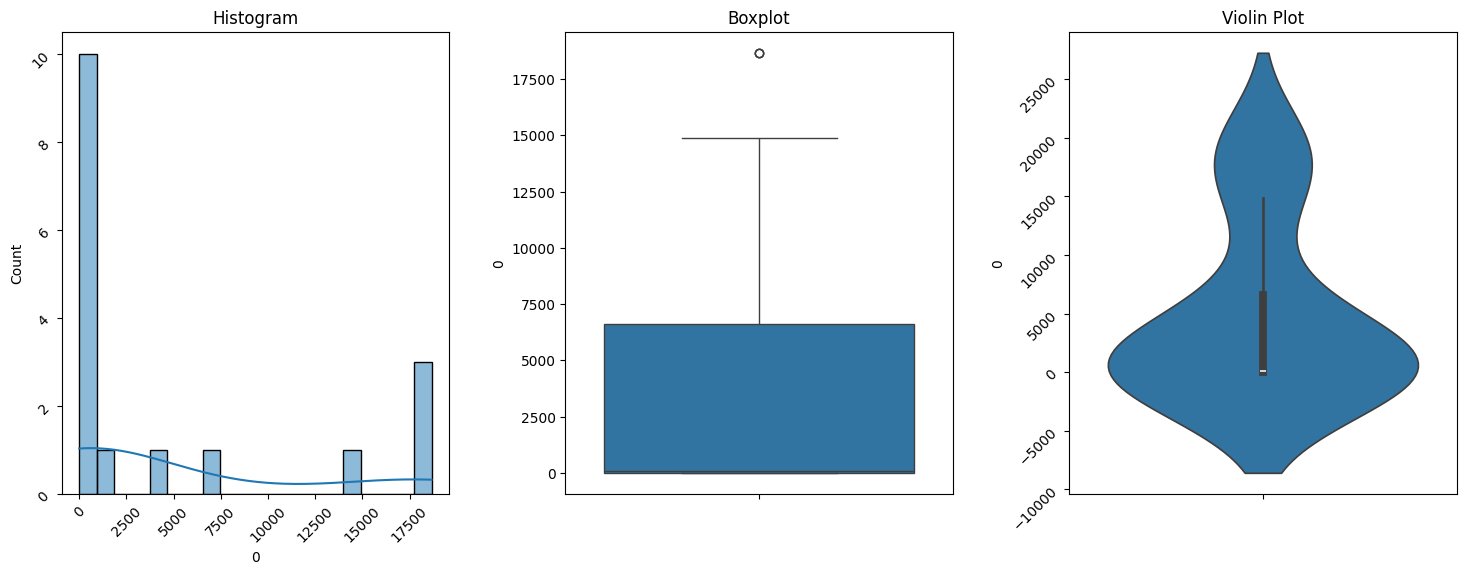

In [36]:
def plot_data(data):
    if data.isna().sum() > 0:
        print(f"Warning: Data contains {data.isna().sum()} NaN values.")

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    sns.histplot(data, bins=20, kde=True, ax=axs[0])
    axs[0].set_title('Histogram')
    axs[0].tick_params(axis='x', labelrotation=45)
    axs[0].tick_params(axis='y', labelrotation=45)

    sns.boxplot(data=data, ax=axs[1])
    axs[1].set_title('Boxplot')
    axs[1].tick_params(axis='x', labelrotation=45)

    sns.violinplot(data=data, ax=axs[2])
    axs[2].set_title('Violin Plot')
    axs[2].tick_params(axis='x', labelrotation=45)
    axs[2].tick_params(axis='y', labelrotation=45)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def enter_txt(file):
    lines = file.readlines()
    data = [line.decode('utf-8').strip().replace(',', ' ').split() for line in lines]
    results = pd.DataFrame(data)
    results.iloc[:, 0] = pd.to_numeric(results.iloc[:, 0], errors='coerce')
    plot_data(results.iloc[:, 0])

def enter_xlsx(file):
    df = pd.read_excel(io.BytesIO(file.read()), sheet_name=None)
    for sheet_name, sheet_data in df.items():
        print(f"Sheet: {sheet_name}")
        sheet_data.iloc[:, 0] = pd.to_numeric(sheet_data.iloc[:, 0], errors='coerce')
        plot_data(sheet_data.iloc[:, 0])

def enter_zip(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for zip_file in zip_ref.namelist():
            if 'Results' in zip_file or '-D' in zip_file:
                folder_name = zip_file.split('/')[0]
                if folder_name.startswith('CEC'):
                    print(f"Entering CEC folder: {folder_name}")
                elif folder_name.startswith('com'):
                    print(f"Entering com folder: {folder_name}")
                elif 'GECCO1' in folder_name:
                    print(f"Entering GECCO1 folder: {folder_name}")
                elif folder_name.startswith('report'):
                    print(f"Entering report folder: {folder_name}")
                if zip_file.endswith('.txt'):
                    print(f"Entering txt file: {zip_file}")
                    with zip_ref.open(zip_file) as file:
                        enter_txt(file)
                elif zip_file.endswith('.xlsx'):
                    print(f"Entering xlsx file: {zip_file}")
                    with zip_ref.open(zip_file) as file:
                        enter_xlsx(file)

enter_zip("Data-All Algos.zip")

**STD & MErr**

In [ ]:
#till we recieve the actual values from Dr. Mostafa

**Normality Check Tests**